In [1]:
#NOTE: NOTE SURE WHY BUT PCA DOES NOT SEEM TO WORK ON MY ENVIRONMENT, SEEMS TO WORK FINE OFF OF IT THOUGH...

# Import libraries i will need
import os
#os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
#import random as python_random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#import gc
import re

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
#import the libraries necessary for confusion plot
import seaborn as sns
from matplotlib import colors

In [1]:
import os
import torchvision
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# read in the data
df_small = pd.read_csv('../data/processed/image-features/local_features_20m.csv') 
df_large = pd.read_csv('../data/processed/image-features/large_features_100m.csv') 

In [3]:
df_large.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Columns: 10000 entries, 0 to 9999
dtypes: float64(10000)
memory usage: 76.3 MB


In [4]:
# might've been easier to do this earlier in R, but need to figure out which rows belong to what
inputPath="../data/processed/cam-2017-20m" # 5495 files
filelist = []

# Load the images, and append them to a list.
for filepath in os.listdir(inputPath):
    if filepath.endswith((".tif")):
    #print(filepath)
        tempfile=inputPath+'/{0}'.format(filepath)
        filelist.append(tempfile)

In [5]:
len(filelist[:2200]) 

2200

In [8]:
filelist_trim =[re.sub('../data/processed/cam-2017-20m/cambdrige-20m-', '', file) for file in filelist]
filelist_trim =[re.sub('.tif', '', file) for file in filelist_trim]
df_small['id_col'] = filelist_trim[:2200]
df_small.head()

,0,1,2,3,4,5,6,7,8,9,...,391,392,393,394,395,396,397,398,399,id_col
0,0.001205,0.005004,0.004743,0.000182,0.007986,0.002908,0.000000,0.002409,0.009945,0.003346,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,point-1
1,0.002179,0.006240,0.006309,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,point-10
2,0.019810,0.012456,0.004468,0.000000,0.000000,0.005599,0.013208,0.000000,0.025515,0.015596,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,point-1000
3,0.016079,0.023360,0.002660,0.014574,0.000000,0.000000,0.002571,0.009957,0.007327,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,point-1001
4,0.010280,0.011240,0.000000,0.000000,0.001415,0.028210,0.015327,0.021854,0.009842,0.013704,...,0.012584,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,point-1002


In [7]:
# might've been easier to do this earlier in R, but need to figure out which rows belong to what
inputPath="../data/processed/cam-2017-100m" # 5495 files
filelist = []

# Load the images, and append them to a list.
for filepath in os.listdir(inputPath):
    if filepath.endswith((".tif")):
    #print(filepath)
        tempfile=inputPath+'/{0}'.format(filepath)
        filelist.append(tempfile)

In [9]:
filelist_trim =[re.sub('../data/processed/cam-2017-100m/cambdrige-100m-', '', file) for file in filelist]
filelist_trim =[re.sub('.tif', '', file) for file in filelist_trim]
df_large['id_col'] = filelist_trim[:1000]
df_large.head()

,0,1,2,3,4,5,6,7,8,9,...,9991,9992,9993,9994,9995,9996,9997,9998,9999,id_col
0,0.070402,0.040430,0.031767,0.031081,0.046301,0.066976,0.024759,0.015722,0.023196,0.021940,...,0.000000,0.000000,0.001782,0.000000,0.000351,0.000000,0.000430,0.019142,0.000000,point-1
1,0.050474,0.000000,0.038055,0.000000,0.000000,0.006756,0.016238,0.013577,0.015716,0.013670,...,0.000000,0.000000,0.006987,0.008010,0.013388,0.000000,0.010781,0.041079,0.008465,point-10
2,0.048996,0.024623,0.031339,0.051936,0.000000,0.025589,0.023514,0.081062,0.000000,0.026476,...,0.033831,0.031421,0.000000,0.000000,0.000000,0.000000,0.012925,0.053861,0.000000,point-1000
3,0.042698,0.000000,0.025461,0.021107,0.005198,0.007447,0.005551,0.051199,0.007671,0.031407,...,0.000000,0.026834,0.056952,0.001201,0.006320,0.047817,0.052337,0.060615,0.031976,point-1001
4,0.023891,0.009476,0.038914,0.006399,0.000266,0.000000,0.000040,0.040400,0.005640,0.026626,...,0.033326,0.007383,0.003979,0.027645,0.000000,0.000000,0.004652,0.024096,0.024652,point-1002


In [10]:
# if it has a large, it should have a corresponding small, not the case the other way around
all_features = df_large.merge(df_small, on='id_col', how='left')

In [11]:
# here is all off the data
id_column = all_features["id_col"] # keep the ids for later
all_features = all_features.drop('id_col', axis=1) # drop id column
all_features.head()

,0_x,1_x,2_x,3_x,4_x,5_x,6_x,7_x,8_x,9_x,...,390_y,391_y,392_y,393_y,394_y,395_y,396_y,397_y,398_y,399_y
0,0.070402,0.040430,0.031767,0.031081,0.046301,0.066976,0.024759,0.015722,0.023196,0.021940,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.050474,0.000000,0.038055,0.000000,0.000000,0.006756,0.016238,0.013577,0.015716,0.013670,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.048996,0.024623,0.031339,0.051936,0.000000,0.025589,0.023514,0.081062,0.000000,0.026476,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.042698,0.000000,0.025461,0.021107,0.005198,0.007447,0.005551,0.051199,0.007671,0.031407,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.023891,0.009476,0.038914,0.006399,0.000266,0.000000,0.000040,0.040400,0.005640,0.026626,...,0.0,0.012584,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
all_features.isnull().sum()
all_features=all_features.dropna(axis=1, how='all')

In [13]:
all_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Columns: 10400 entries, 0_x to 399_y
dtypes: float64(10400)
memory usage: 79.4 MB


In [6]:
df_small = df_small.drop('id_col', axis=1) 
df_small.head()

,0,1,2,3,4,5,6,7,8,9,...,390,391,392,393,394,395,396,397,398,399
0,0.001205,0.005004,0.004743,0.000182,0.007986,0.002908,0.000000,0.002409,0.009945,0.003346,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.002179,0.006240,0.006309,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.019810,0.012456,0.004468,0.000000,0.000000,0.005599,0.013208,0.000000,0.025515,0.015596,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.016079,0.023360,0.002660,0.014574,0.000000,0.000000,0.002571,0.009957,0.007327,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.010280,0.011240,0.000000,0.000000,0.001415,0.028210,0.015327,0.021854,0.009842,0.013704,...,0.0,0.012584,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [2]:
#21-11-22 work with 25m data
df_25m = pd.read_csv('../data/processed/image-features/cae-25m-features-21-11-22.csv')

In [3]:
df_25m = df_25m.drop('Unnamed: 0', axis=1) 
file_path = df_25m["file_path"]
df_25m = df_25m.drop('file_path', axis=1) 
df_25m.head()

,0,1,2,3,4,5,6,7,8,9,...,4598,4599,4600,4601,4602,4603,4604,4605,4606,4607
0,0.066820,-0.646343,-0.012813,-0.291650,-0.501946,-0.871483,0.332327,-0.404748,-0.596287,-0.494417,...,0.832207,0.584715,0.505150,0.754489,0.750900,0.009431,0.133339,0.496358,0.212997,0.011814
1,-1.748947,-0.822722,-0.525193,-0.201431,-0.246531,-1.170550,-1.263862,-0.351626,0.010943,-1.216667,...,0.596031,0.957895,0.935607,0.870999,1.069563,-0.491675,-0.362456,-0.197953,-0.468028,-1.330559
2,-0.974752,-0.207831,-0.701708,-0.395834,-0.448195,-0.680279,-0.676957,-0.270040,-1.176902,0.372147,...,0.407518,1.267254,0.746135,0.830255,0.226385,-0.140410,-0.040638,0.531682,0.360136,-0.433765
3,-1.028587,-0.665060,-0.564062,-0.851081,-0.398494,-0.928020,-1.342871,-1.178661,-1.032883,-0.942380,...,0.937814,-0.532454,0.406204,0.059265,-0.532149,-0.423228,0.321084,-0.488578,0.151527,0.767455
4,-1.599855,0.243974,-0.951751,0.609137,-0.789370,-0.889489,-0.336313,-0.858258,-0.613412,-0.761079,...,1.569910,0.885979,0.999796,0.630372,0.463618,0.431810,0.328018,0.293223,0.961664,1.132532


In [4]:
file_path

0        ../data/processed/cam-2016-25m/cambdrige-25m-p...
1        ../data/processed/glo-2021-25m/gloucester-25m-...
2        ../data/processed/glo-2021-25m/gloucester-25m-...
3        ../data/processed/glo-2021-25m/gloucester-25m-...
4        ../data/processed/glo-2018-25m/gloucester-25m-...
                               ...                        
26822    ../data/processed/oxf-2019-25m/oxford-25m-poin...
26823    ../data/processed/glo-2018-25m/gloucester-25m-...
26824    ../data/processed/glo-2021-25m/gloucester-25m-...
26825    ../data/processed/glo-2018-25m/gloucester-25m-...
26826    ../data/processed/oxf-2016-25m/oxford-25m-poin...
Name: file_path, Length: 26827, dtype: object

In [6]:
df_25m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26827 entries, 0 to 26826
Columns: 4608 entries, 0 to 4607
dtypes: float64(4608)
memory usage: 943.1 MB


In [5]:
x = StandardScaler().fit_transform(df_25m)

In [6]:
x.shape, type(x)

((26827, 4608), numpy.ndarray)

In [7]:
pca = PCA()

In [8]:
%%time
principalComponents = pca.fit_transform(x)
variance_list=pca.explained_variance_ratio_

CPU times: total: 5min 30s
Wall time: 44.9 s


In [9]:
principalComponents.shape, variance_list.shape

((26827, 4608), (4608,))

Text(0, 0.5, 'Explained Variance')

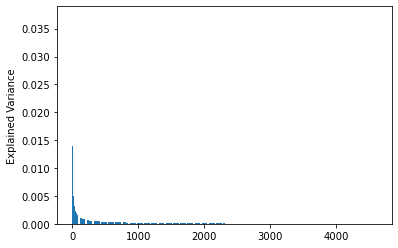

In [10]:
plt.bar(np.arange(1,4609),variance_list)
plt.ylabel('Explained Variance')

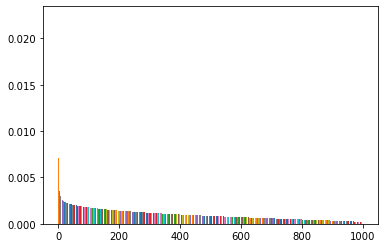

In [45]:
# for row in range(1000):
#     plt.bar(row, variance_list[row])

Text(0, 0.5, 'Cumulative Explained Variance')

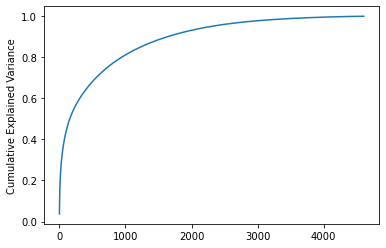

In [12]:
plt.plot(np.cumsum(variance_list))
plt.ylabel('Cumulative Explained Variance')

In [13]:
pc_df= pd.DataFrame(principalComponents)

In [14]:
pc_df

,0,1,2,3,4,5,6,7,8,9,...,4598,4599,4600,4601,4602,4603,4604,4605,4606,4607
0,18.262722,-21.454129,8.131297,21.092716,-0.548183,19.486933,8.273909,-9.924063,11.166672,3.628066,...,0.072527,-0.180336,0.025396,-0.013991,-0.074223,0.005323,-0.012434,-0.010867,0.035739,-0.027096
1,-9.050082,13.906564,14.998982,9.927260,-5.512800,-7.333578,13.053189,-12.901798,-1.510712,-4.194842,...,-0.050981,0.023405,-0.008772,0.094962,-0.019310,-0.133320,0.093459,-0.017748,-0.021324,0.007855
2,-14.264362,-5.997448,-0.348773,-1.977609,-6.661345,2.695936,-4.058928,-11.524970,-0.187045,-7.472137,...,0.165416,-0.237494,0.224479,0.040307,-0.159912,0.075458,-0.065152,0.076840,-0.070479,-0.010039
3,-6.838938,-1.047667,4.302623,-7.749605,-17.830830,5.956939,-12.145921,-5.624902,-9.656416,-1.875817,...,-0.063013,0.177233,-0.213747,0.140129,0.076159,0.107616,0.127824,-0.078451,-0.044613,-0.056658
4,-11.450666,-11.818013,-4.370730,10.760022,3.234099,4.045743,2.674242,-10.546521,8.968477,2.136017,...,0.170539,-0.144218,0.127035,-0.178911,-0.056362,0.096571,-0.036062,0.011636,-0.032717,-0.061666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26822,7.872174,13.889005,19.288990,10.472715,6.085761,-5.100769,7.335869,2.913715,9.676716,-0.414599,...,0.050014,0.125746,-0.044315,-0.006451,0.078531,-0.013934,0.120655,0.021492,0.201350,-0.038435
26823,-15.197723,-0.996636,20.431664,-4.630281,-6.506852,-1.407149,-15.279334,1.639445,0.697931,1.318621,...,0.006790,0.098471,-0.288137,0.140172,0.027237,-0.134713,0.035705,0.068987,0.197360,-0.062172
26824,-0.190882,-1.201057,4.705671,2.692983,-3.291491,-1.119086,-11.870601,-4.322772,-15.867364,4.032406,...,0.160131,-0.082517,0.028011,-0.037857,0.006474,0.227936,0.109184,-0.006713,0.073989,-0.219910
26825,-3.986150,7.785551,-14.591350,-4.670235,-13.815103,-2.225740,12.014190,-0.707754,7.282546,-0.546187,...,-0.049510,-0.084668,-0.023938,-0.011421,0.024956,0.087258,-0.045538,0.004072,-0.069897,0.070927


In [31]:
list(pc_df.columns.values)

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [17]:
pc_df.info()
pc_df.sort_values(by=0,ascending=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26827 entries, 0 to 26826
Columns: 4608 entries, 0 to 4607
dtypes: float64(4608)
memory usage: 943.1 MB


,0,1,2,3,4,5,6,7,8,9,...,4598,4599,4600,4601,4602,4603,4604,4605,4606,4607
26192,44.173871,-0.753122,0.284056,-2.520364,6.324702,0.954869,-1.176904,8.600441,3.463750,-7.538242,...,-0.080051,0.008836,0.160479,0.038829,-0.062665,0.123603,0.442065,-0.001690,0.485220,-0.027098
7715,43.878776,1.167062,8.305208,4.962455,-2.757621,-2.960866,-3.024678,12.076913,3.264263,-5.470922,...,-0.006095,0.057841,-0.052736,-0.091582,0.110064,0.029820,-0.124098,-0.136602,0.236167,0.084903
8769,43.615398,-5.305877,-5.147140,4.186504,3.103304,-3.015500,2.281098,6.976055,-0.249989,2.532321,...,-0.186137,0.306696,-0.055000,0.048090,-0.015935,-0.061567,0.031751,-0.051948,-0.160406,-0.072032
8377,43.552913,-8.050221,-2.436446,-2.970637,-5.605160,-4.763172,-4.671873,3.750874,8.117865,0.436314,...,-0.120408,-0.111839,-0.037275,-0.054810,-0.311954,-0.197066,0.018082,0.033483,0.057049,-0.019012
17890,43.203398,1.937700,2.410283,-1.068982,0.407761,-0.602388,-2.650234,7.641751,-0.876358,-2.119201,...,-0.130979,-0.077173,0.189807,0.122676,-0.264495,-0.186827,-0.261868,0.139016,0.460468,0.069705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10944,-42.150899,15.914059,1.931514,-3.034986,-5.090583,0.600364,4.433269,9.671089,5.275390,2.025458,...,-0.077051,-0.256305,-0.108584,0.027172,0.011719,-0.001272,-0.070077,-0.119886,0.090289,0.029889
10392,-42.481408,25.901830,1.057490,2.039067,-0.453436,-0.639041,0.343901,6.104399,8.506324,-0.956394,...,-0.055981,0.051892,0.060885,-0.092976,0.131446,0.076949,0.122949,-0.043188,0.024830,0.070764
346,-42.719071,22.588413,1.801171,0.774941,-2.074192,-1.654541,1.000181,8.555891,7.414614,-3.013453,...,-0.071328,-0.221673,0.083971,-0.067932,-0.053674,-0.034677,0.188585,0.100863,0.022747,0.053583
10735,-43.316516,19.523957,4.259470,-1.052085,2.339625,-5.424900,-3.575060,10.209955,7.745726,3.183881,...,0.079302,0.130605,-0.260312,0.008620,0.026905,-0.152905,0.187654,-0.109365,0.101694,-0.037031


# are any of the components highly correlated with any of the RTC things that we care about?



### IF NOT, MOVE ON TO KMEANS



In [11]:
# pick some number of components to run the KMeans on, number or threshold?
cluster_features =principalComponents[:,:200]

In [12]:
cluster_features.shape

(26827, 200)

In [13]:
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [21]:
# # define the model
# cluster_model = KMeans(n_clusters=40,n_init=1,random_state=42,verbose=1)
# # fit the model
# cluster_model.fit(cluster_features)

In [22]:
# cluster_model.

In [23]:
# # assign a cluster to each example
# yhat = cluster_model.predict(cluster_features)
# # retrieve unique clusters
# clusters = np.unique(yhat)

In [24]:
# cluster_pd=pd.DataFrame({"yhat":yhat})

In [25]:
%%time
# pick the right number of clusters? 
Sum_of_squared_distances = []
K = range(1,75)
for k in K:
    print(k)
    km = KMeans(n_clusters=k,n_init=1,random_state=42,verbose=1)
    km = km.fit(cluster_features)
    Sum_of_squared_distances.append(km.inertia_)

1
Initialization complete
Iteration 0, inertia 108191965.60614417.
Iteration 1, inertia 66097528.54427885.
Converged at iteration 1: strict convergence.
2
Initialization complete
Iteration 0, inertia 106868180.96923931
Iteration 1, inertia 64461002.97995677
Iteration 2, inertia 63886970.43545989
Iteration 3, inertia 63644852.21500431
Iteration 4, inertia 63528029.17117519
Iteration 5, inertia 63462487.76003282
Iteration 6, inertia 63426136.844788656
Iteration 7, inertia 63404385.05331837
Iteration 8, inertia 63389235.242637
Iteration 9, inertia 63379293.46509298
Iteration 10, inertia 63372508.24442282
Iteration 11, inertia 63367590.90196823
Iteration 12, inertia 63364141.54098404
Iteration 13, inertia 63361513.52610746
Iteration 14, inertia 63359796.577797726
Iteration 15, inertia 63358716.08881973
Iteration 16, inertia 63357962.01321059
Iteration 17, inertia 63357284.81437743
Iteration 18, inertia 63356619.58345366
Iteration 19, inertia 63356161.63089538
Iteration 20, inertia 63355958

Initialization complete
Iteration 0, inertia 94243725.59964651
Iteration 1, inertia 59950346.47942985
Iteration 2, inertia 58997102.42464386
Iteration 3, inertia 58746234.7324915
Iteration 4, inertia 58664235.039835274
Iteration 5, inertia 58631355.19015132
Iteration 6, inertia 58612891.08210922
Iteration 7, inertia 58600605.88108842
Iteration 8, inertia 58592124.67565294
Iteration 9, inertia 58586961.536301784
Iteration 10, inertia 58583568.61896862
Iteration 11, inertia 58580772.21197817
Iteration 12, inertia 58578397.41381552
Iteration 13, inertia 58576534.62366668
Iteration 14, inertia 58574926.10719031
Iteration 15, inertia 58573913.16579877
Iteration 16, inertia 58572958.629532665
Iteration 17, inertia 58572239.46465811
Iteration 18, inertia 58571610.0775929
Iteration 19, inertia 58571083.264200166
Iteration 20, inertia 58570657.72572606
Iteration 21, inertia 58570211.36835945
Iteration 22, inertia 58569770.76185861
Iteration 23, inertia 58569407.87587629
Iteration 24, inertia 58

Iteration 42, inertia 56796317.955835365
Iteration 43, inertia 56796261.7684662
Iteration 44, inertia 56796226.965268396
Iteration 45, inertia 56796195.23745884
Iteration 46, inertia 56796172.051512726
Iteration 47, inertia 56796155.6846622
Iteration 48, inertia 56796137.71214878
Iteration 49, inertia 56796121.53147718
Iteration 50, inertia 56796115.24944001
Iteration 51, inertia 56796110.47652035
Iteration 52, inertia 56796106.91084477
Iteration 53, inertia 56796103.67362114
Converged at iteration 53: center shift 0.0009418906720008806 within tolerance 0.0012319217307988001.
12
Initialization complete
Iteration 0, inertia 88761891.95395368
Iteration 1, inertia 58685444.819766656
Iteration 2, inertia 57553593.89718904
Iteration 3, inertia 57191169.78129437
Iteration 4, inertia 57009527.27736712
Iteration 5, inertia 56908848.72601133
Iteration 6, inertia 56848749.07584247
Iteration 7, inertia 56811098.71766775
Iteration 8, inertia 56788287.2590819
Iteration 9, inertia 56771042.3176049
I

Iteration 3, inertia 56823808.43805195
Iteration 4, inertia 56629728.28639655
Iteration 5, inertia 56516809.57282687
Iteration 6, inertia 56452756.483017094
Iteration 7, inertia 56410409.78771062
Iteration 8, inertia 56378930.48901457
Iteration 9, inertia 56353477.26646849
Iteration 10, inertia 56331430.1300215
Iteration 11, inertia 56312879.79599693
Iteration 12, inertia 56295030.68747093
Iteration 13, inertia 56277308.62735039
Iteration 14, inertia 56258241.43862361
Iteration 15, inertia 56240557.21593875
Iteration 16, inertia 56224690.167583324
Iteration 17, inertia 56212055.43960965
Iteration 18, inertia 56202037.81006932
Iteration 19, inertia 56194421.074222915
Iteration 20, inertia 56188483.569360554
Iteration 21, inertia 56184308.85732777
Iteration 22, inertia 56180722.45446724
Iteration 23, inertia 56176968.90309599
Iteration 24, inertia 56173507.046760745
Iteration 25, inertia 56170163.50028948
Iteration 26, inertia 56166625.47367713
Iteration 27, inertia 56163378.68118029
Ite

Iteration 222, inertia 56068857.85208989
Iteration 223, inertia 56068821.81443562
Iteration 224, inertia 56068802.44093352
Iteration 225, inertia 56068778.75028891
Iteration 226, inertia 56068765.222639665
Iteration 227, inertia 56068737.45702554
Iteration 228, inertia 56068704.56683444
Iteration 229, inertia 56068683.92681938
Iteration 230, inertia 56068664.70569898
Iteration 231, inertia 56068654.95318697
Iteration 232, inertia 56068648.40451762
Iteration 233, inertia 56068631.57318169
Iteration 234, inertia 56068598.22098661
Iteration 235, inertia 56068577.76353065
Iteration 236, inertia 56068560.35173202
Iteration 237, inertia 56068549.500345565
Iteration 238, inertia 56068535.9324043
Iteration 239, inertia 56068516.31817225
Iteration 240, inertia 56068505.47156249
Iteration 241, inertia 56068491.42709023
Iteration 242, inertia 56068483.08833572
Iteration 243, inertia 56068476.70325998
Iteration 244, inertia 56068472.90037508
Iteration 245, inertia 56068468.56249878
Iteration 246, 

Iteration 74, inertia 55630905.34975986
Iteration 75, inertia 55630220.32748362
Iteration 76, inertia 55629587.16759646
Iteration 77, inertia 55629048.42460467
Iteration 78, inertia 55628575.71664255
Iteration 79, inertia 55628060.87733509
Iteration 80, inertia 55627622.917361945
Iteration 81, inertia 55627120.10539778
Iteration 82, inertia 55626598.071758285
Iteration 83, inertia 55626061.90264546
Iteration 84, inertia 55625369.49333865
Iteration 85, inertia 55624303.820570014
Iteration 86, inertia 55623401.25669842
Iteration 87, inertia 55622600.547243044
Iteration 88, inertia 55621860.3574433
Iteration 89, inertia 55621244.73922359
Iteration 90, inertia 55620532.98121017
Iteration 91, inertia 55619797.37054031
Iteration 92, inertia 55619126.35148708
Iteration 93, inertia 55618342.657535985
Iteration 94, inertia 55617541.44046259
Iteration 95, inertia 55616819.83572573
Iteration 96, inertia 55616327.876277864
Iteration 97, inertia 55615733.9260094
Iteration 98, inertia 55615268.61811

Initialization complete
Iteration 0, inertia 86973151.57973476
Iteration 1, inertia 57617960.9703202
Iteration 2, inertia 56396706.746036746
Iteration 3, inertia 56012790.742511295
Iteration 4, inertia 55848027.73074845
Iteration 5, inertia 55760014.123854615
Iteration 6, inertia 55704018.49467345
Iteration 7, inertia 55661535.580240585
Iteration 8, inertia 55628861.518776946
Iteration 9, inertia 55600062.54988517
Iteration 10, inertia 55572856.0559759
Iteration 11, inertia 55547964.119878896
Iteration 12, inertia 55523729.892100856
Iteration 13, inertia 55499030.367094025
Iteration 14, inertia 55475415.48512244
Iteration 15, inertia 55452696.74250792
Iteration 16, inertia 55432452.28677047
Iteration 17, inertia 55414459.655289076
Iteration 18, inertia 55399294.83973896
Iteration 19, inertia 55386688.4422455
Iteration 20, inertia 55374987.114046045
Iteration 21, inertia 55364802.448064215
Iteration 22, inertia 55355756.87321295
Iteration 23, inertia 55348066.30367433
Iteration 24, iner

Iteration 37, inertia 54965530.30741325
Iteration 38, inertia 54962026.41903982
Iteration 39, inertia 54958677.52659469
Iteration 40, inertia 54955622.973057404
Iteration 41, inertia 54952921.00961244
Iteration 42, inertia 54950409.96450257
Iteration 43, inertia 54948113.5950691
Iteration 44, inertia 54946013.767682396
Iteration 45, inertia 54944497.390696004
Iteration 46, inertia 54943466.88930134
Iteration 47, inertia 54942234.506502226
Iteration 48, inertia 54941131.77051212
Iteration 49, inertia 54940197.7222395
Iteration 50, inertia 54939196.81047716
Iteration 51, inertia 54938085.14358814
Iteration 52, inertia 54936677.292461656
Iteration 53, inertia 54935608.83033639
Iteration 54, inertia 54934757.1041871
Iteration 55, inertia 54933842.04203079
Iteration 56, inertia 54933019.28492702
Iteration 57, inertia 54932190.78860663
Iteration 58, inertia 54931424.39138393
Iteration 59, inertia 54930538.4967233
Iteration 60, inertia 54929723.80798094
Iteration 61, inertia 54929140.95559455

Iteration 31, inertia 54666622.04080658
Iteration 32, inertia 54664209.12754768
Iteration 33, inertia 54662313.93096086
Iteration 34, inertia 54660350.69352757
Iteration 35, inertia 54658642.80225482
Iteration 36, inertia 54657301.36142989
Iteration 37, inertia 54655926.21630688
Iteration 38, inertia 54654745.56882842
Iteration 39, inertia 54653658.195216395
Iteration 40, inertia 54652705.99958777
Iteration 41, inertia 54651784.670423836
Iteration 42, inertia 54650656.117941536
Iteration 43, inertia 54649411.46410316
Iteration 44, inertia 54648446.31668514
Iteration 45, inertia 54647597.520825975
Iteration 46, inertia 54646885.13105595
Iteration 47, inertia 54646286.78118738
Iteration 48, inertia 54645569.639593594
Iteration 49, inertia 54644898.05199457
Iteration 50, inertia 54644272.650601774
Iteration 51, inertia 54643433.02834297
Iteration 52, inertia 54642707.64797051
Iteration 53, inertia 54641667.47011985
Iteration 54, inertia 54640682.92839077
Iteration 55, inertia 54640141.580

Initialization complete
Iteration 0, inertia 85621199.40431257
Iteration 1, inertia 56240519.253000535
Iteration 2, inertia 55406824.81475978
Iteration 3, inertia 55099651.35928234
Iteration 4, inertia 54936255.65660925
Iteration 5, inertia 54824322.50278105
Iteration 6, inertia 54739456.92845267
Iteration 7, inertia 54677222.48152052
Iteration 8, inertia 54630523.407940306
Iteration 9, inertia 54592163.76730266
Iteration 10, inertia 54560791.585223734
Iteration 11, inertia 54531323.82920611
Iteration 12, inertia 54508739.34987965
Iteration 13, inertia 54489653.159248345
Iteration 14, inertia 54474054.046897426
Iteration 15, inertia 54460877.22027559
Iteration 16, inertia 54450766.82350908
Iteration 17, inertia 54442615.29452372
Iteration 18, inertia 54434465.132347666
Iteration 19, inertia 54428216.239837125
Iteration 20, inertia 54423499.963598065
Iteration 21, inertia 54419441.31653369
Iteration 22, inertia 54416249.36571376
Iteration 23, inertia 54413073.16383334
Iteration 24, iner

Iteration 99, inertia 54226674.61511788
Iteration 100, inertia 54226603.12482535
Iteration 101, inertia 54226513.12915643
Iteration 102, inertia 54226415.491698705
Iteration 103, inertia 54226300.57476128
Iteration 104, inertia 54226200.7422658
Iteration 105, inertia 54226079.27463645
Iteration 106, inertia 54225986.675832964
Iteration 107, inertia 54225908.6721357
Iteration 108, inertia 54225851.83533813
Iteration 109, inertia 54225793.44721906
Iteration 110, inertia 54225735.093430996
Iteration 111, inertia 54225690.572089665
Iteration 112, inertia 54225623.01090815
Iteration 113, inertia 54225548.57237931
Iteration 114, inertia 54225484.68744113
Iteration 115, inertia 54225411.68733481
Iteration 116, inertia 54225322.02876911
Iteration 117, inertia 54225234.87894911
Iteration 118, inertia 54225119.14395055
Iteration 119, inertia 54225025.6946384
Iteration 120, inertia 54224905.32440271
Iteration 121, inertia 54224813.55895326
Iteration 122, inertia 54224750.46816805
Iteration 123, i

Iteration 56, inertia 53966043.09421825
Iteration 57, inertia 53965585.92223621
Iteration 58, inertia 53965275.23786502
Iteration 59, inertia 53964972.12715925
Iteration 60, inertia 53964712.335530765
Iteration 61, inertia 53964520.28769588
Iteration 62, inertia 53964339.392101444
Iteration 63, inertia 53964214.999121
Iteration 64, inertia 53964109.19897734
Iteration 65, inertia 53964039.85443485
Iteration 66, inertia 53963981.00669045
Iteration 67, inertia 53963923.92094657
Iteration 68, inertia 53963866.9358364
Iteration 69, inertia 53963823.10206357
Iteration 70, inertia 53963774.525329314
Iteration 71, inertia 53963730.853341796
Iteration 72, inertia 53963674.102225125
Iteration 73, inertia 53963589.43654428
Iteration 74, inertia 53963486.3560387
Iteration 75, inertia 53963441.121144414
Iteration 76, inertia 53963386.701358914
Iteration 77, inertia 53963344.5991493
Iteration 78, inertia 53963293.41995476
Iteration 79, inertia 53963261.435159825
Iteration 80, inertia 53963248.648035

Iteration 86, inertia 53762140.387773834
Iteration 87, inertia 53761135.54319714
Iteration 88, inertia 53759795.82841541
Iteration 89, inertia 53758562.799023524
Iteration 90, inertia 53757429.30494925
Iteration 91, inertia 53756151.55293393
Iteration 92, inertia 53754875.195073925
Iteration 93, inertia 53753650.42255337
Iteration 94, inertia 53752797.481049255
Iteration 95, inertia 53752016.14891193
Iteration 96, inertia 53750937.62745628
Iteration 97, inertia 53749998.84484014
Iteration 98, inertia 53748897.89513012
Iteration 99, inertia 53747631.287821025
Iteration 100, inertia 53746710.10149606
Iteration 101, inertia 53745738.87938767
Iteration 102, inertia 53745013.251470596
Iteration 103, inertia 53744168.40538965
Iteration 104, inertia 53743332.849311605
Iteration 105, inertia 53742790.733182386
Iteration 106, inertia 53742386.06767031
Iteration 107, inertia 53741997.15852029
Iteration 108, inertia 53741528.14322809
Iteration 109, inertia 53741138.12172238
Iteration 110, inertia

Iteration 24, inertia 53635455.92207163
Iteration 25, inertia 53633190.92091644
Iteration 26, inertia 53631247.743109524
Iteration 27, inertia 53629280.38047621
Iteration 28, inertia 53627671.97323665
Iteration 29, inertia 53626167.399501994
Iteration 30, inertia 53624802.014164515
Iteration 31, inertia 53623783.465238035
Iteration 32, inertia 53622900.0530178
Iteration 33, inertia 53622064.32303437
Iteration 34, inertia 53621387.712162524
Iteration 35, inertia 53620754.018657625
Iteration 36, inertia 53619958.135320775
Iteration 37, inertia 53619259.43657689
Iteration 38, inertia 53618700.752360836
Iteration 39, inertia 53618279.68277801
Iteration 40, inertia 53617686.4109485
Iteration 41, inertia 53617110.38664497
Iteration 42, inertia 53616547.1102715
Iteration 43, inertia 53615814.306566745
Iteration 44, inertia 53614976.72028214
Iteration 45, inertia 53614172.38296272
Iteration 46, inertia 53613241.59445799
Iteration 47, inertia 53612268.821127705
Iteration 48, inertia 53611444.00

Iteration 88, inertia 53441864.191188216
Iteration 89, inertia 53441728.98668749
Iteration 90, inertia 53441638.39803968
Iteration 91, inertia 53441598.19399066
Iteration 92, inertia 53441558.51739377
Iteration 93, inertia 53441518.18347535
Iteration 94, inertia 53441472.51855079
Iteration 95, inertia 53441419.024913505
Iteration 96, inertia 53441346.685056835
Iteration 97, inertia 53441297.428467706
Iteration 98, inertia 53441241.54424755
Iteration 99, inertia 53441185.26898837
Iteration 100, inertia 53441164.03080968
Iteration 101, inertia 53441123.97789234
Iteration 102, inertia 53441099.943309985
Iteration 103, inertia 53441083.83625142
Iteration 104, inertia 53441072.473469205
Iteration 105, inertia 53441066.259561196
Iteration 106, inertia 53441056.378889464
Iteration 107, inertia 53441051.506759845
Iteration 108, inertia 53441046.16693823
Iteration 109, inertia 53441035.37162027
Iteration 110, inertia 53441028.57440571
Iteration 111, inertia 53441022.28829867
Iteration 112, iner

Iteration 75, inertia 53247569.10949654
Iteration 76, inertia 53246934.38457419
Iteration 77, inertia 53246487.1376242
Iteration 78, inertia 53246136.89731699
Iteration 79, inertia 53245686.511557095
Iteration 80, inertia 53245269.73809991
Iteration 81, inertia 53244973.45096499
Iteration 82, inertia 53244698.56884578
Iteration 83, inertia 53244396.56866832
Iteration 84, inertia 53243877.82176802
Iteration 85, inertia 53243297.75811699
Iteration 86, inertia 53242657.2163652
Iteration 87, inertia 53242108.76557197
Iteration 88, inertia 53241688.3841235
Iteration 89, inertia 53241348.44240847
Iteration 90, inertia 53241027.828145616
Iteration 91, inertia 53240601.29825547
Iteration 92, inertia 53240163.655383535
Iteration 93, inertia 53239716.07187908
Iteration 94, inertia 53239322.3338265
Iteration 95, inertia 53238954.066260114
Iteration 96, inertia 53238625.4087343
Iteration 97, inertia 53238381.785658784
Iteration 98, inertia 53238131.86382518
Iteration 99, inertia 53237972.85230138


Iteration 137, inertia 53132083.73249914
Iteration 138, inertia 53131683.11865071
Iteration 139, inertia 53131382.725440964
Iteration 140, inertia 53130931.83196485
Iteration 141, inertia 53130495.35576906
Iteration 142, inertia 53130147.05557867
Iteration 143, inertia 53129812.90505508
Iteration 144, inertia 53129434.81877326
Iteration 145, inertia 53129005.7428185
Iteration 146, inertia 53128471.453973524
Iteration 147, inertia 53128002.48999892
Iteration 148, inertia 53127693.076061465
Iteration 149, inertia 53127366.201908045
Iteration 150, inertia 53127073.5858252
Iteration 151, inertia 53126716.10196123
Iteration 152, inertia 53126318.4472547
Iteration 153, inertia 53125882.44218151
Iteration 154, inertia 53125515.787051134
Iteration 155, inertia 53125103.562838994
Iteration 156, inertia 53124787.89306488
Iteration 157, inertia 53124418.14858473
Iteration 158, inertia 53124184.36917136
Iteration 159, inertia 53123967.40636758
Iteration 160, inertia 53123823.76513039
Iteration 161

Iteration 43, inertia 53036428.93412346
Iteration 44, inertia 53033949.77332666
Iteration 45, inertia 53031688.30412375
Iteration 46, inertia 53029737.55206263
Iteration 47, inertia 53028610.647951744
Iteration 48, inertia 53027730.950107396
Iteration 49, inertia 53026875.41485897
Iteration 50, inertia 53026033.50461784
Iteration 51, inertia 53025192.09444896
Iteration 52, inertia 53024328.87657988
Iteration 53, inertia 53023654.719814144
Iteration 54, inertia 53022808.26477921
Iteration 55, inertia 53022070.76634772
Iteration 56, inertia 53021404.82458608
Iteration 57, inertia 53020623.88541547
Iteration 58, inertia 53019881.71648231
Iteration 59, inertia 53018973.678456746
Iteration 60, inertia 53018040.02008213
Iteration 61, inertia 53017058.048283614
Iteration 62, inertia 53016033.51527489
Iteration 63, inertia 53014885.41540661
Iteration 64, inertia 53013227.77359675
Iteration 65, inertia 53011257.95577072
Iteration 66, inertia 53009577.55805211
Iteration 67, inertia 53007789.9297

Iteration 17, inertia 53092481.0964872
Iteration 18, inertia 53083205.156695336
Iteration 19, inertia 53075557.73233944
Iteration 20, inertia 53068978.75658512
Iteration 21, inertia 53062519.060010836
Iteration 22, inertia 53056223.23977075
Iteration 23, inertia 53049886.874084294
Iteration 24, inertia 53043505.13691314
Iteration 25, inertia 53038050.35998834
Iteration 26, inertia 53032594.829430886
Iteration 27, inertia 53027013.68589273
Iteration 28, inertia 53021531.35681452
Iteration 29, inertia 53016743.62712927
Iteration 30, inertia 53012084.66761202
Iteration 31, inertia 53007755.54333075
Iteration 32, inertia 53003486.95769385
Iteration 33, inertia 52999266.56745217
Iteration 34, inertia 52995466.916058674
Iteration 35, inertia 52992208.539145574
Iteration 36, inertia 52989198.966729574
Iteration 37, inertia 52986860.52520666
Iteration 38, inertia 52984893.09096159
Iteration 39, inertia 52983168.0607358
Iteration 40, inertia 52981487.551276654
Iteration 41, inertia 52979812.362

Iteration 102, inertia 52849518.07791089
Iteration 103, inertia 52849508.09520182
Iteration 104, inertia 52849501.947450675
Iteration 105, inertia 52849486.81899014
Iteration 106, inertia 52849476.517308004
Iteration 107, inertia 52849467.628879316
Iteration 108, inertia 52849462.36379301
Iteration 109, inertia 52849452.899626404
Iteration 110, inertia 52849419.92777133
Iteration 111, inertia 52849375.506110474
Iteration 112, inertia 52849299.60440441
Iteration 113, inertia 52849174.60257712
Iteration 114, inertia 52849096.8692524
Iteration 115, inertia 52849017.105098225
Iteration 116, inertia 52848934.375476174
Iteration 117, inertia 52848834.566633165
Iteration 118, inertia 52848769.73435667
Iteration 119, inertia 52848715.811770916
Iteration 120, inertia 52848671.671910495
Iteration 121, inertia 52848644.909592815
Iteration 122, inertia 52848636.44044985
Iteration 123, inertia 52848622.59380965
Iteration 124, inertia 52848605.76001362
Iteration 125, inertia 52848595.42082412
Iterat

Iteration 62, inertia 52715583.02286293
Iteration 63, inertia 52714845.244934626
Iteration 64, inertia 52713925.38700851
Iteration 65, inertia 52712968.89429707
Iteration 66, inertia 52712023.19307511
Iteration 67, inertia 52711156.643179804
Iteration 68, inertia 52710357.91243015
Iteration 69, inertia 52709638.612989105
Iteration 70, inertia 52708903.694464095
Iteration 71, inertia 52708098.76553874
Iteration 72, inertia 52707121.28920458
Iteration 73, inertia 52706051.19915999
Iteration 74, inertia 52704963.19107596
Iteration 75, inertia 52704150.38573163
Iteration 76, inertia 52703217.80581709
Iteration 77, inertia 52702197.469873264
Iteration 78, inertia 52701180.05984886
Iteration 79, inertia 52700253.60594257
Iteration 80, inertia 52699290.09555422
Iteration 81, inertia 52698462.866440125
Iteration 82, inertia 52697782.90893685
Iteration 83, inertia 52697196.433834665
Iteration 84, inertia 52696737.60384032
Iteration 85, inertia 52696407.365515776
Iteration 86, inertia 52696120.2

Iteration 39, inertia 52634118.6832107
Iteration 40, inertia 52632880.80152323
Iteration 41, inertia 52631812.84308899
Iteration 42, inertia 52630730.95826857
Iteration 43, inertia 52629680.55541131
Iteration 44, inertia 52628853.15827769
Iteration 45, inertia 52628147.76663612
Iteration 46, inertia 52627421.00564295
Iteration 47, inertia 52626680.42013222
Iteration 48, inertia 52625823.37282998
Iteration 49, inertia 52624945.84050653
Iteration 50, inertia 52624140.750050604
Iteration 51, inertia 52623570.40137908
Iteration 52, inertia 52623117.57762057
Iteration 53, inertia 52622709.68186255
Iteration 54, inertia 52622323.77785128
Iteration 55, inertia 52621949.84435725
Iteration 56, inertia 52621515.139692225
Iteration 57, inertia 52621070.71278238
Iteration 58, inertia 52620774.22061331
Iteration 59, inertia 52620430.333025426
Iteration 60, inertia 52620168.288281195
Iteration 61, inertia 52619886.99581016
Iteration 62, inertia 52619640.844408125
Iteration 63, inertia 52619389.03117

Iteration 84, inertia 52478510.13890382
Iteration 85, inertia 52478021.89974393
Iteration 86, inertia 52477636.89258502
Iteration 87, inertia 52477295.007496245
Iteration 88, inertia 52476903.8798113
Iteration 89, inertia 52476581.06341657
Iteration 90, inertia 52476256.49804684
Iteration 91, inertia 52475873.98245789
Iteration 92, inertia 52475315.49747409
Iteration 93, inertia 52474875.18189151
Iteration 94, inertia 52474386.17635631
Iteration 95, inertia 52474045.38063122
Iteration 96, inertia 52473708.824157014
Iteration 97, inertia 52473412.68338535
Iteration 98, inertia 52473183.96006627
Iteration 99, inertia 52473015.93014555
Iteration 100, inertia 52472817.094768204
Iteration 101, inertia 52472581.00917676
Iteration 102, inertia 52472398.86292079
Iteration 103, inertia 52472194.41158762
Iteration 104, inertia 52472025.651710205
Iteration 105, inertia 52471854.26192913
Iteration 106, inertia 52471702.69752638
Iteration 107, inertia 52471563.595051
Iteration 108, inertia 52471457

Iteration 36, inertia 52372754.604265586
Iteration 37, inertia 52371558.985425994
Iteration 38, inertia 52370495.46746688
Iteration 39, inertia 52369570.86642127
Iteration 40, inertia 52368426.14508775
Iteration 41, inertia 52367248.590307675
Iteration 42, inertia 52365778.18215433
Iteration 43, inertia 52364714.61210334
Iteration 44, inertia 52363784.70529837
Iteration 45, inertia 52362944.461158454
Iteration 46, inertia 52362074.26923507
Iteration 47, inertia 52360779.10198175
Iteration 48, inertia 52359038.38075567
Iteration 49, inertia 52357744.45714741
Iteration 50, inertia 52356533.38659373
Iteration 51, inertia 52355070.61081031
Iteration 52, inertia 52353697.00503901
Iteration 53, inertia 52352520.76617758
Iteration 54, inertia 52351634.75755269
Iteration 55, inertia 52350821.29340707
Iteration 56, inertia 52350081.472441144
Iteration 57, inertia 52349185.354137704
Iteration 58, inertia 52348552.431874596
Iteration 59, inertia 52348009.87388685
Iteration 60, inertia 52347485.93

Iteration 34, inertia 52252513.325386874
Iteration 35, inertia 52250577.82566867
Iteration 36, inertia 52248582.19089716
Iteration 37, inertia 52246656.94878317
Iteration 38, inertia 52245124.965206675
Iteration 39, inertia 52243965.821229234
Iteration 40, inertia 52242715.91973349
Iteration 41, inertia 52241578.5146489
Iteration 42, inertia 52240583.85462871
Iteration 43, inertia 52239828.166031405
Iteration 44, inertia 52239296.09673624
Iteration 45, inertia 52238624.082612485
Iteration 46, inertia 52237988.03186789
Iteration 47, inertia 52237469.53002679
Iteration 48, inertia 52236962.30284617
Iteration 49, inertia 52236387.62211121
Iteration 50, inertia 52235585.72929561
Iteration 51, inertia 52234804.61114647
Iteration 52, inertia 52234021.23871905
Iteration 53, inertia 52233220.248420805
Iteration 54, inertia 52232537.468956605
Iteration 55, inertia 52231745.893100105
Iteration 56, inertia 52230952.61338864
Iteration 57, inertia 52230180.54947291
Iteration 58, inertia 52229451.92

Iteration 54, inertia 52099411.88392226
Iteration 55, inertia 52098915.49772906
Iteration 56, inertia 52098405.56311371
Iteration 57, inertia 52098039.04409049
Iteration 58, inertia 52097788.47995865
Iteration 59, inertia 52097501.33432996
Iteration 60, inertia 52097119.601952806
Iteration 61, inertia 52096686.40561869
Iteration 62, inertia 52096335.75966717
Iteration 63, inertia 52095941.72536976
Iteration 64, inertia 52095608.380215794
Iteration 65, inertia 52095356.73328879
Iteration 66, inertia 52095140.14125083
Iteration 67, inertia 52094947.206376515
Iteration 68, inertia 52094735.816479504
Iteration 69, inertia 52094494.69774098
Iteration 70, inertia 52094309.51951031
Iteration 71, inertia 52094091.440847084
Iteration 72, inertia 52093927.3820716
Iteration 73, inertia 52093710.67408712
Iteration 74, inertia 52093528.33466029
Iteration 75, inertia 52093371.140954025
Iteration 76, inertia 52093244.99960165
Iteration 77, inertia 52093158.74871574
Iteration 78, inertia 52093125.3328

Iteration 31, inertia 52059373.107689984
Iteration 32, inertia 52055670.777671956
Iteration 33, inertia 52051830.10045561
Iteration 34, inertia 52048125.89301878
Iteration 35, inertia 52044843.071769744
Iteration 36, inertia 52042117.28698981
Iteration 37, inertia 52040211.58878425
Iteration 38, inertia 52038311.795623265
Iteration 39, inertia 52036451.18800515
Iteration 40, inertia 52034985.91747091
Iteration 41, inertia 52033706.34000163
Iteration 42, inertia 52032449.36850295
Iteration 43, inertia 52031306.95118742
Iteration 44, inertia 52030375.33658582
Iteration 45, inertia 52029473.736441955
Iteration 46, inertia 52028628.800432906
Iteration 47, inertia 52027747.52522522
Iteration 48, inertia 52026886.76001705
Iteration 49, inertia 52026091.29714921
Iteration 50, inertia 52025128.738573894
Iteration 51, inertia 52024105.42652152
Iteration 52, inertia 52023165.05593322
Iteration 53, inertia 52022123.56057195
Iteration 54, inertia 52021227.14159444
Iteration 55, inertia 52020238.67

Iteration 75, inertia 51857098.80074629
Iteration 76, inertia 51856626.24881419
Iteration 77, inertia 51856298.635272324
Iteration 78, inertia 51855978.2613207
Iteration 79, inertia 51855529.30941975
Iteration 80, inertia 51855200.206247985
Iteration 81, inertia 51854799.90375868
Iteration 82, inertia 51854368.84415067
Iteration 83, inertia 51853950.42716397
Iteration 84, inertia 51853459.88198775
Iteration 85, inertia 51853050.4968442
Iteration 86, inertia 51852611.40125032
Iteration 87, inertia 51852230.25531837
Iteration 88, inertia 51851899.08160631
Iteration 89, inertia 51851531.76058344
Iteration 90, inertia 51851144.70179
Iteration 91, inertia 51850954.585593246
Iteration 92, inertia 51850777.81657344
Iteration 93, inertia 51850620.030617215
Iteration 94, inertia 51850454.96452797
Iteration 95, inertia 51850299.48564028
Iteration 96, inertia 51850172.103797354
Iteration 97, inertia 51850030.239714146
Iteration 98, inertia 51849872.277240075
Iteration 99, inertia 51849716.6162318

Iteration 77, inertia 51764232.82222873
Iteration 78, inertia 51764208.30709314
Iteration 79, inertia 51764143.54389924
Iteration 80, inertia 51764108.490213566
Iteration 81, inertia 51764083.679745845
Iteration 82, inertia 51764065.05940649
Iteration 83, inertia 51764054.51434089
Iteration 84, inertia 51764044.87766586
Iteration 85, inertia 51764035.27110488
Iteration 86, inertia 51764013.44913072
Iteration 87, inertia 51763982.77773161
Iteration 88, inertia 51763960.5358239
Iteration 89, inertia 51763953.530896634
Iteration 90, inertia 51763932.353458494
Iteration 91, inertia 51763909.13243808
Iteration 92, inertia 51763873.559697665
Iteration 93, inertia 51763842.52360747
Iteration 94, inertia 51763818.959899664
Iteration 95, inertia 51763800.784087636
Iteration 96, inertia 51763792.2169526
Iteration 97, inertia 51763783.36853969
Iteration 98, inertia 51763767.25460489
Iteration 99, inertia 51763732.35983797
Iteration 100, inertia 51763685.268423006
Iteration 101, inertia 51763634.2

Iteration 9, inertia 51816092.64948465
Iteration 10, inertia 51784491.58815418
Iteration 11, inertia 51760737.71390336
Iteration 12, inertia 51741264.788130045
Iteration 13, inertia 51727715.86345064
Iteration 14, inertia 51715538.49960607
Iteration 15, inertia 51704447.65704217
Iteration 16, inertia 51694429.80883649
Iteration 17, inertia 51686074.257775195
Iteration 18, inertia 51679310.30016215
Iteration 19, inertia 51673454.70452977
Iteration 20, inertia 51667883.53427002
Iteration 21, inertia 51662529.74782447
Iteration 22, inertia 51657642.919046104
Iteration 23, inertia 51653484.211522706
Iteration 24, inertia 51650027.26199477
Iteration 25, inertia 51647231.62305697
Iteration 26, inertia 51644370.02584476
Iteration 27, inertia 51641541.488843516
Iteration 28, inertia 51639547.56637628
Iteration 29, inertia 51637665.60012043
Iteration 30, inertia 51636021.780911036
Iteration 31, inertia 51634602.39169799
Iteration 32, inertia 51633275.83276354
Iteration 33, inertia 51632256.9430

Iteration 29, inertia 51525926.372459814
Iteration 30, inertia 51523184.42758665
Iteration 31, inertia 51520538.72084149
Iteration 32, inertia 51517779.47455285
Iteration 33, inertia 51514886.655391246
Iteration 34, inertia 51512595.502202705
Iteration 35, inertia 51510504.00350921
Iteration 36, inertia 51508602.505036145
Iteration 37, inertia 51506742.79780501
Iteration 38, inertia 51505073.96099936
Iteration 39, inertia 51503731.9456988
Iteration 40, inertia 51502700.50178077
Iteration 41, inertia 51501583.95792317
Iteration 42, inertia 51500622.498168096
Iteration 43, inertia 51499606.1046564
Iteration 44, inertia 51498641.181351215
Iteration 45, inertia 51497881.63648469
Iteration 46, inertia 51497072.743284635
Iteration 47, inertia 51496300.39516349
Iteration 48, inertia 51495524.91499989
Iteration 49, inertia 51494884.46321654
Iteration 50, inertia 51494345.37842313
Iteration 51, inertia 51493905.542288795
Iteration 52, inertia 51493616.776203424
Iteration 53, inertia 51493456.26

Iteration 120, inertia 51417855.38144317
Iteration 121, inertia 51417616.30755531
Iteration 122, inertia 51417293.76375072
Iteration 123, inertia 51417080.76523302
Iteration 124, inertia 51416896.11964674
Iteration 125, inertia 51416717.41398584
Iteration 126, inertia 51416437.05425717
Iteration 127, inertia 51416057.977895394
Iteration 128, inertia 51415654.402928695
Iteration 129, inertia 51415356.66504658
Iteration 130, inertia 51415106.76633302
Iteration 131, inertia 51414876.62570339
Iteration 132, inertia 51414638.66168978
Iteration 133, inertia 51414415.90022466
Iteration 134, inertia 51414187.16446448
Iteration 135, inertia 51413940.14386461
Iteration 136, inertia 51413797.40907518
Iteration 137, inertia 51413702.64478677
Iteration 138, inertia 51413558.93518833
Iteration 139, inertia 51413445.32361796
Iteration 140, inertia 51413342.06103271
Iteration 141, inertia 51413230.77150081
Iteration 142, inertia 51413115.83395737
Iteration 143, inertia 51413005.16410082
Iteration 144,

Iteration 96, inertia 51340919.525074065
Iteration 97, inertia 51340812.01003997
Iteration 98, inertia 51340685.18080372
Iteration 99, inertia 51340622.16052531
Iteration 100, inertia 51340569.68527259
Iteration 101, inertia 51340508.04094556
Iteration 102, inertia 51340409.37245525
Iteration 103, inertia 51340332.609063834
Iteration 104, inertia 51340297.422053635
Iteration 105, inertia 51340269.48149245
Iteration 106, inertia 51340229.87496943
Iteration 107, inertia 51340191.52408844
Converged at iteration 107: strict convergence.
66
Initialization complete
Iteration 0, inertia 78693714.47851175
Iteration 1, inertia 53221548.977544226
Iteration 2, inertia 52360410.20557292
Iteration 3, inertia 52062709.241425805
Iteration 4, inertia 51890139.75268503
Iteration 5, inertia 51770843.06048239
Iteration 6, inertia 51690700.95902987
Iteration 7, inertia 51629772.461783625
Iteration 8, inertia 51577748.539290674
Iteration 9, inertia 51536357.580198154
Iteration 10, inertia 51502121.10323087

Iteration 46, inertia 51219736.11754746
Iteration 47, inertia 51219088.078623466
Iteration 48, inertia 51218468.66799133
Iteration 49, inertia 51217954.82243732
Iteration 50, inertia 51217638.43668621
Iteration 51, inertia 51217336.49312783
Iteration 52, inertia 51217057.58237681
Iteration 53, inertia 51216866.08433171
Iteration 54, inertia 51216656.70972392
Iteration 55, inertia 51216497.797408134
Iteration 56, inertia 51216366.995871864
Iteration 57, inertia 51216126.36135851
Iteration 58, inertia 51215870.77738113
Iteration 59, inertia 51215709.75420054
Iteration 60, inertia 51215512.05004534
Iteration 61, inertia 51215328.758786395
Iteration 62, inertia 51215258.96562528
Iteration 63, inertia 51215130.250419125
Iteration 64, inertia 51214993.25528127
Iteration 65, inertia 51214881.946235135
Iteration 66, inertia 51214777.869373485
Iteration 67, inertia 51214672.04091294
Iteration 68, inertia 51214552.31997135
Iteration 69, inertia 51214400.16966171
Iteration 70, inertia 51214146.54

Iteration 23, inertia 51129678.098440915
Iteration 24, inertia 51124794.01471016
Iteration 25, inertia 51120504.77917768
Iteration 26, inertia 51116849.01896556
Iteration 27, inertia 51114393.25187518
Iteration 28, inertia 51112338.25494481
Iteration 29, inertia 51110580.0792078
Iteration 30, inertia 51109473.17039534
Iteration 31, inertia 51108427.59568235
Iteration 32, inertia 51107689.20566449
Iteration 33, inertia 51107152.91912327
Iteration 34, inertia 51106614.663206585
Iteration 35, inertia 51106149.06871044
Iteration 36, inertia 51105689.29035384
Iteration 37, inertia 51105294.50928813
Iteration 38, inertia 51104945.941597395
Iteration 39, inertia 51104697.017765984
Iteration 40, inertia 51104482.731956676
Iteration 41, inertia 51104265.260293856
Iteration 42, inertia 51104089.15100918
Iteration 43, inertia 51103971.94441028
Iteration 44, inertia 51103829.94297469
Iteration 45, inertia 51103708.11899835
Iteration 46, inertia 51103596.31435868
Iteration 47, inertia 51103402.2877

Iteration 87, inertia 51022566.676369846
Iteration 88, inertia 51022514.73339419
Iteration 89, inertia 51022502.52490234
Iteration 90, inertia 51022472.89088636
Iteration 91, inertia 51022460.2722491
Iteration 92, inertia 51022411.55426578
Iteration 93, inertia 51022354.04051699
Iteration 94, inertia 51022271.445477985
Iteration 95, inertia 51022196.002274916
Iteration 96, inertia 51022051.25461236
Iteration 97, inertia 51022008.516331196
Iteration 98, inertia 51021998.26601189
Converged at iteration 98: strict convergence.
74
Initialization complete
Iteration 0, inertia 78250337.91683601
Iteration 1, inertia 52937157.922442876
Iteration 2, inertia 52030300.865297355
Iteration 3, inertia 51705764.994535
Iteration 4, inertia 51527166.06654013
Iteration 5, inertia 51413014.848369144
Iteration 6, inertia 51336423.59301492
Iteration 7, inertia 51285068.5070103
Iteration 8, inertia 51245171.26413873
Iteration 9, inertia 51213657.937128186
Iteration 10, inertia 51185812.01734098
Iteration 11

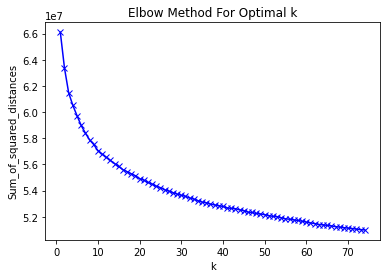

In [26]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [67]:
%%time
# define the model
cluster_model = KMeans(n_clusters=40,n_init=50,random_state=42,verbose=1)
# fit the model
cluster_model.fit(cluster_features)

Initialization complete
Iteration 0, inertia 82494166.06414448
Iteration 1, inertia 54751572.80653778
Iteration 2, inertia 53821169.79534888
Iteration 3, inertia 53505609.58095899
Iteration 4, inertia 53336107.21357018
Iteration 5, inertia 53231459.929781176
Iteration 6, inertia 53166444.8719796
Iteration 7, inertia 53122577.92900262
Iteration 8, inertia 53090254.06063275
Iteration 9, inertia 53063273.22445669
Iteration 10, inertia 53041440.06547974
Iteration 11, inertia 53021247.91438942
Iteration 12, inertia 53002612.393212914
Iteration 13, inertia 52986335.38769882
Iteration 14, inertia 52971810.08639867
Iteration 15, inertia 52958912.35145547
Iteration 16, inertia 52947615.292130895
Iteration 17, inertia 52937265.05680878
Iteration 18, inertia 52927253.261444636
Iteration 19, inertia 52918619.77675468
Iteration 20, inertia 52911042.11385522
Iteration 21, inertia 52904312.733501315
Iteration 22, inertia 52897946.78772678
Iteration 23, inertia 52892563.73964914
Iteration 24, inertia 

Converged at iteration 90: strict convergence.
Initialization complete
Iteration 0, inertia 79043001.03516448
Iteration 1, inertia 54773354.68065231
Iteration 2, inertia 53830425.1341267
Iteration 3, inertia 53526616.4936766
Iteration 4, inertia 53375715.76092292
Iteration 5, inertia 53282004.758195095
Iteration 6, inertia 53211143.25598719
Iteration 7, inertia 53156545.132355444
Iteration 8, inertia 53114320.78319708
Iteration 9, inertia 53078085.273629315
Iteration 10, inertia 53047515.98153129
Iteration 11, inertia 53020804.92383588
Iteration 12, inertia 52998639.17156678
Iteration 13, inertia 52980873.45872367
Iteration 14, inertia 52966484.495902516
Iteration 15, inertia 52953465.70492755
Iteration 16, inertia 52942789.441963434
Iteration 17, inertia 52933495.48096595
Iteration 18, inertia 52926749.53903352
Iteration 19, inertia 52922045.569149874
Iteration 20, inertia 52917094.539849326
Iteration 21, inertia 52911425.27440257
Iteration 22, inertia 52906459.60210839
Iteration 23, 

Iteration 56, inertia 52752644.89377705
Iteration 57, inertia 52752136.32142844
Iteration 58, inertia 52751702.765649274
Iteration 59, inertia 52751395.76155368
Iteration 60, inertia 52751077.65020272
Iteration 61, inertia 52750892.532638274
Iteration 62, inertia 52750687.59966221
Iteration 63, inertia 52750463.05020081
Iteration 64, inertia 52750133.87371332
Iteration 65, inertia 52749837.310050674
Iteration 66, inertia 52749641.63974988
Iteration 67, inertia 52749497.381237686
Iteration 68, inertia 52749378.172039464
Iteration 69, inertia 52749266.69104706
Iteration 70, inertia 52749128.34911383
Iteration 71, inertia 52748989.47552209
Iteration 72, inertia 52748769.57163732
Iteration 73, inertia 52748449.336727075
Iteration 74, inertia 52748118.41173319
Iteration 75, inertia 52747879.15747946
Iteration 76, inertia 52747581.52610509
Iteration 77, inertia 52747275.3728886
Iteration 78, inertia 52746988.820926204
Iteration 79, inertia 52746804.23204745
Iteration 80, inertia 52746649.480

Iteration 19, inertia 52953778.795944035
Iteration 20, inertia 52948132.409217775
Iteration 21, inertia 52942483.68299847
Iteration 22, inertia 52936436.28843898
Iteration 23, inertia 52930185.287923895
Iteration 24, inertia 52923797.57852147
Iteration 25, inertia 52916653.84583854
Iteration 26, inertia 52910690.2097868
Iteration 27, inertia 52904312.27046177
Iteration 28, inertia 52897784.43961262
Iteration 29, inertia 52892073.36083322
Iteration 30, inertia 52887454.83778986
Iteration 31, inertia 52882978.41856716
Iteration 32, inertia 52879559.381580025
Iteration 33, inertia 52876423.55115912
Iteration 34, inertia 52873831.912594154
Iteration 35, inertia 52871363.86222171
Iteration 36, inertia 52869069.31885093
Iteration 37, inertia 52867108.31916906
Iteration 38, inertia 52865275.67687979
Iteration 39, inertia 52863672.51477966
Iteration 40, inertia 52862127.90769147
Iteration 41, inertia 52860324.09818447
Iteration 42, inertia 52858638.25253311
Iteration 43, inertia 52856884.83505

Iteration 121, inertia 52796232.49052449
Iteration 122, inertia 52796063.007627666
Iteration 123, inertia 52795942.412995294
Iteration 124, inertia 52795827.19006689
Iteration 125, inertia 52795749.972264
Iteration 126, inertia 52795672.89803656
Iteration 127, inertia 52795551.758537374
Iteration 128, inertia 52795481.395670705
Iteration 129, inertia 52795426.48831893
Iteration 130, inertia 52795355.52924161
Iteration 131, inertia 52795310.621532455
Iteration 132, inertia 52795249.25102528
Iteration 133, inertia 52795195.74823954
Iteration 134, inertia 52795159.11061413
Iteration 135, inertia 52795104.84992318
Iteration 136, inertia 52795033.9219843
Iteration 137, inertia 52794967.670416914
Iteration 138, inertia 52794885.868752815
Iteration 139, inertia 52794814.43597156
Iteration 140, inertia 52794755.97781958
Iteration 141, inertia 52794669.29425776
Iteration 142, inertia 52794578.624214984
Iteration 143, inertia 52794474.0429091
Iteration 144, inertia 52794393.69393035
Iteration 14

Iteration 0, inertia 81949176.62837034
Iteration 1, inertia 55042830.078503154
Iteration 2, inertia 53960259.65487128
Iteration 3, inertia 53557162.038537875
Iteration 4, inertia 53359440.26958365
Iteration 5, inertia 53232951.27356677
Iteration 6, inertia 53143896.645262346
Iteration 7, inertia 53084029.9729593
Iteration 8, inertia 53040510.38794143
Iteration 9, inertia 53006321.28273236
Iteration 10, inertia 52978853.20180199
Iteration 11, inertia 52956159.21357176
Iteration 12, inertia 52937353.21099998
Iteration 13, inertia 52921066.15852489
Iteration 14, inertia 52907456.23745449
Iteration 15, inertia 52895710.65773995
Iteration 16, inertia 52885377.41409451
Iteration 17, inertia 52875359.46296483
Iteration 18, inertia 52867541.677477755
Iteration 19, inertia 52861198.38686718
Iteration 20, inertia 52855693.20368886
Iteration 21, inertia 52851618.776743464
Iteration 22, inertia 52847928.11454571
Iteration 23, inertia 52844332.20865722
Iteration 24, inertia 52841413.22761916
Iterat

Initialization complete
Iteration 0, inertia 81112804.4726359
Iteration 1, inertia 54969674.522020854
Iteration 2, inertia 53890998.50401726
Iteration 3, inertia 53567477.34994709
Iteration 4, inertia 53413732.629288055
Iteration 5, inertia 53327488.88619117
Iteration 6, inertia 53267942.23064975
Iteration 7, inertia 53218937.17006616
Iteration 8, inertia 53173101.288218334
Iteration 9, inertia 53127579.32085654
Iteration 10, inertia 53083889.62441883
Iteration 11, inertia 53050355.27229484
Iteration 12, inertia 53024693.53461208
Iteration 13, inertia 53002725.32235266
Iteration 14, inertia 52983472.152595066
Iteration 15, inertia 52967371.44075761
Iteration 16, inertia 52953527.746173605
Iteration 17, inertia 52942558.015392475
Iteration 18, inertia 52931695.897986546
Iteration 19, inertia 52922404.28668485
Iteration 20, inertia 52914533.02105303
Iteration 21, inertia 52907362.63894625
Iteration 22, inertia 52900775.43873482
Iteration 23, inertia 52894699.36178788
Iteration 24, inerti

Iteration 75, inertia 52797835.59908031
Iteration 76, inertia 52797289.89070995
Iteration 77, inertia 52796640.663994804
Iteration 78, inertia 52795829.33979567
Iteration 79, inertia 52794871.66417045
Iteration 80, inertia 52793285.713559784
Iteration 81, inertia 52792036.81083341
Iteration 82, inertia 52790977.35198705
Iteration 83, inertia 52790098.211146824
Iteration 84, inertia 52789430.49877459
Iteration 85, inertia 52788749.363776915
Iteration 86, inertia 52788094.910814375
Iteration 87, inertia 52787510.43117282
Iteration 88, inertia 52786996.04317175
Iteration 89, inertia 52786501.77354595
Iteration 90, inertia 52785915.75240309
Iteration 91, inertia 52785293.500013374
Iteration 92, inertia 52784721.034797035
Iteration 93, inertia 52784200.183358654
Iteration 94, inertia 52783667.80570711
Iteration 95, inertia 52783158.07041102
Iteration 96, inertia 52782644.41309325
Iteration 97, inertia 52782109.061871506
Iteration 98, inertia 52781640.041402616
Iteration 99, inertia 52781289

Iteration 16, inertia 52960453.66035724
Iteration 17, inertia 52945932.20682328
Iteration 18, inertia 52933087.62553313
Iteration 19, inertia 52921163.26906784
Iteration 20, inertia 52909938.42927486
Iteration 21, inertia 52898885.5609047
Iteration 22, inertia 52886557.62943439
Iteration 23, inertia 52875018.16910443
Iteration 24, inertia 52865298.19012265
Iteration 25, inertia 52857168.58308901
Iteration 26, inertia 52850572.58733949
Iteration 27, inertia 52845713.34856207
Iteration 28, inertia 52841740.58614031
Iteration 29, inertia 52838307.301553555
Iteration 30, inertia 52834944.23272647
Iteration 31, inertia 52832632.87006151
Iteration 32, inertia 52830877.48909803
Iteration 33, inertia 52829211.717606865
Iteration 34, inertia 52827660.47098678
Iteration 35, inertia 52826161.52804745
Iteration 36, inertia 52824671.95800338
Iteration 37, inertia 52823185.27323344
Iteration 38, inertia 52821893.61358933
Iteration 39, inertia 52820744.938421026
Iteration 40, inertia 52819827.4002091

Iteration 55, inertia 52803345.586750105
Iteration 56, inertia 52802339.611864805
Iteration 57, inertia 52801501.32196484
Iteration 58, inertia 52800832.27282331
Iteration 59, inertia 52800015.26318742
Iteration 60, inertia 52799469.73686861
Iteration 61, inertia 52798973.38379848
Iteration 62, inertia 52798511.30481233
Iteration 63, inertia 52798016.09094472
Iteration 64, inertia 52797529.9227024
Iteration 65, inertia 52797086.96204913
Iteration 66, inertia 52796624.28024603
Iteration 67, inertia 52795993.12762803
Iteration 68, inertia 52795410.50483714
Iteration 69, inertia 52794680.26820433
Iteration 70, inertia 52793874.84130914
Iteration 71, inertia 52793145.61155659
Iteration 72, inertia 52792432.98187295
Iteration 73, inertia 52791770.62241312
Iteration 74, inertia 52791117.11704579
Iteration 75, inertia 52790199.13280834
Iteration 76, inertia 52789334.08734244
Iteration 77, inertia 52788814.26669894
Iteration 78, inertia 52788334.71246326
Iteration 79, inertia 52787855.23130067

Iteration 53, inertia 52815682.26485459
Iteration 54, inertia 52815455.77895033
Iteration 55, inertia 52815205.62698182
Iteration 56, inertia 52814977.97363499
Iteration 57, inertia 52814697.85024562
Iteration 58, inertia 52814479.27045858
Iteration 59, inertia 52814208.98526923
Iteration 60, inertia 52813971.5540713
Iteration 61, inertia 52813762.74545258
Iteration 62, inertia 52813545.428865835
Iteration 63, inertia 52813354.75807509
Iteration 64, inertia 52813172.33452724
Iteration 65, inertia 52812953.1080992
Iteration 66, inertia 52812630.5605573
Iteration 67, inertia 52811946.01621241
Iteration 68, inertia 52811377.39939092
Iteration 69, inertia 52811040.48986987
Iteration 70, inertia 52810818.79292893
Iteration 71, inertia 52810642.049771026
Iteration 72, inertia 52810405.3075169
Iteration 73, inertia 52810214.01174534
Iteration 74, inertia 52809986.037309006
Iteration 75, inertia 52809664.084864296
Iteration 76, inertia 52809255.56243497
Iteration 77, inertia 52808895.67254701


Iteration 120, inertia 52773392.72322795
Iteration 121, inertia 52773290.89979419
Iteration 122, inertia 52773075.220370494
Iteration 123, inertia 52772833.9648309
Iteration 124, inertia 52772687.99518761
Iteration 125, inertia 52772584.87849047
Iteration 126, inertia 52772490.227523245
Iteration 127, inertia 52772417.4352104
Iteration 128, inertia 52772347.23564457
Iteration 129, inertia 52772089.68951769
Iteration 130, inertia 52771784.323943764
Iteration 131, inertia 52771441.37070318
Iteration 132, inertia 52771264.8367594
Iteration 133, inertia 52771153.42893702
Iteration 134, inertia 52771057.5320911
Iteration 135, inertia 52770970.60769235
Iteration 136, inertia 52770857.87319378
Iteration 137, inertia 52770765.070417166
Iteration 138, inertia 52770691.24893176
Iteration 139, inertia 52770602.07051595
Iteration 140, inertia 52770530.60973225
Iteration 141, inertia 52770478.1521786
Iteration 142, inertia 52770422.46717961
Iteration 143, inertia 52770354.95671517
Iteration 144, in

Iteration 20, inertia 52906902.25278704
Iteration 21, inertia 52900905.814261146
Iteration 22, inertia 52895339.05765988
Iteration 23, inertia 52888921.22970303
Iteration 24, inertia 52881908.52016212
Iteration 25, inertia 52875316.526372746
Iteration 26, inertia 52869206.2251025
Iteration 27, inertia 52864266.59346313
Iteration 28, inertia 52860243.404459246
Iteration 29, inertia 52856649.30903102
Iteration 30, inertia 52853317.412879646
Iteration 31, inertia 52850470.54365344
Iteration 32, inertia 52847898.81457181
Iteration 33, inertia 52845769.47701422
Iteration 34, inertia 52843813.698031865
Iteration 35, inertia 52842150.06853849
Iteration 36, inertia 52840610.35342942
Iteration 37, inertia 52839005.30967048
Iteration 38, inertia 52837455.44137338
Iteration 39, inertia 52835619.69402072
Iteration 40, inertia 52833892.06745139
Iteration 41, inertia 52832698.18352644
Iteration 42, inertia 52831352.4794049
Iteration 43, inertia 52829885.01134947
Iteration 44, inertia 52828476.982251

Iteration 46, inertia 52816921.219521925
Iteration 47, inertia 52815589.41868074
Iteration 48, inertia 52813992.53890984
Iteration 49, inertia 52812266.57814384
Iteration 50, inertia 52810040.702482775
Iteration 51, inertia 52807257.71223472
Iteration 52, inertia 52804539.6126689
Iteration 53, inertia 52802177.37152677
Iteration 54, inertia 52799725.84739083
Iteration 55, inertia 52797529.5806431
Iteration 56, inertia 52795425.118490845
Iteration 57, inertia 52793386.33140155
Iteration 58, inertia 52791482.678869896
Iteration 59, inertia 52789989.38558518
Iteration 60, inertia 52788837.0537343
Iteration 61, inertia 52788033.01443008
Iteration 62, inertia 52787252.022723906
Iteration 63, inertia 52786335.41357664
Iteration 64, inertia 52785553.13513185
Iteration 65, inertia 52784380.92736753
Iteration 66, inertia 52783347.918778785
Iteration 67, inertia 52782504.88208248
Iteration 68, inertia 52781718.80060353
Iteration 69, inertia 52781074.98890462
Iteration 70, inertia 52780447.144990

Iteration 168, inertia 52754318.556760296
Iteration 169, inertia 52754195.06529902
Iteration 170, inertia 52754058.96435197
Iteration 171, inertia 52753907.411303334
Iteration 172, inertia 52753803.99327136
Iteration 173, inertia 52753702.071223885
Iteration 174, inertia 52753587.214848116
Iteration 175, inertia 52753516.71977798
Iteration 176, inertia 52753470.070690006
Iteration 177, inertia 52753413.59405607
Iteration 178, inertia 52753353.71592818
Iteration 179, inertia 52753301.77462888
Iteration 180, inertia 52753237.703142986
Iteration 181, inertia 52753190.14341247
Iteration 182, inertia 52753172.872495174
Iteration 183, inertia 52753155.689431876
Iteration 184, inertia 52753126.06774281
Iteration 185, inertia 52753084.93545578
Iteration 186, inertia 52753018.03314531
Iteration 187, inertia 52752960.690012366
Iteration 188, inertia 52752918.140388414
Iteration 189, inertia 52752872.492073625
Iteration 190, inertia 52752823.31880207
Iteration 191, inertia 52752779.51902603
Itera

Initialization complete
Iteration 0, inertia 82837215.23215128
Iteration 1, inertia 54855681.65058571
Iteration 2, inertia 53806233.32331011
Iteration 3, inertia 53464842.64960167
Iteration 4, inertia 53318715.48981579
Iteration 5, inertia 53234683.11898397
Iteration 6, inertia 53176419.523744315
Iteration 7, inertia 53128424.40734015
Iteration 8, inertia 53087934.90685809
Iteration 9, inertia 53053590.43972777
Iteration 10, inertia 53026135.903508246
Iteration 11, inertia 53002592.17482479
Iteration 12, inertia 52981083.23324476
Iteration 13, inertia 52960676.987777345
Iteration 14, inertia 52943662.108589135
Iteration 15, inertia 52929118.62879759
Iteration 16, inertia 52915280.854402654
Iteration 17, inertia 52901966.115417294
Iteration 18, inertia 52889531.02149293
Iteration 19, inertia 52876734.353981905
Iteration 20, inertia 52866063.83648965
Iteration 21, inertia 52858300.02875237
Iteration 22, inertia 52852062.97620091
Iteration 23, inertia 52846108.318747714
Iteration 24, iner

Iteration 103, inertia 52750645.92827395
Iteration 104, inertia 52750490.935076095
Iteration 105, inertia 52750359.428274855
Iteration 106, inertia 52750248.68890615
Iteration 107, inertia 52750158.81192486
Iteration 108, inertia 52750089.540663026
Iteration 109, inertia 52750035.70551606
Iteration 110, inertia 52749980.124091215
Iteration 111, inertia 52749928.454065114
Iteration 112, inertia 52749855.954275005
Iteration 113, inertia 52749802.05385181
Iteration 114, inertia 52749724.94396359
Iteration 115, inertia 52749609.13529458
Iteration 116, inertia 52749486.68811637
Iteration 117, inertia 52749332.77943848
Iteration 118, inertia 52749198.25682345
Iteration 119, inertia 52749098.58957
Iteration 120, inertia 52749009.747441486
Iteration 121, inertia 52748932.175356984
Iteration 122, inertia 52748879.07426664
Iteration 123, inertia 52748811.00984159
Iteration 124, inertia 52748711.75118347
Iteration 125, inertia 52748568.290749
Iteration 126, inertia 52748423.99950047
Iteration 127

Iteration 46, inertia 52780357.642944284
Iteration 47, inertia 52779993.05878038
Iteration 48, inertia 52779624.4811924
Iteration 49, inertia 52779200.84051485
Iteration 50, inertia 52778800.05964787
Iteration 51, inertia 52778440.45092154
Iteration 52, inertia 52778101.18506141
Iteration 53, inertia 52777789.55608922
Iteration 54, inertia 52777456.49132318
Iteration 55, inertia 52777180.09654696
Iteration 56, inertia 52776921.491575405
Iteration 57, inertia 52776644.27624183
Iteration 58, inertia 52776317.22691209
Iteration 59, inertia 52775861.949637994
Iteration 60, inertia 52775441.48799173
Iteration 61, inertia 52774954.86717786
Iteration 62, inertia 52774605.438683175
Iteration 63, inertia 52774347.34594072
Iteration 64, inertia 52774161.03830677
Iteration 65, inertia 52773976.10968915
Iteration 66, inertia 52773764.14091965
Iteration 67, inertia 52773549.985694945
Iteration 68, inertia 52773317.809859075
Iteration 69, inertia 52773091.53041889
Iteration 70, inertia 52772929.7546

Iteration 55, inertia 52796011.26272067
Iteration 56, inertia 52795736.79001436
Iteration 57, inertia 52795403.97126873
Iteration 58, inertia 52795057.79700673
Iteration 59, inertia 52794706.290789574
Iteration 60, inertia 52794447.15116018
Iteration 61, inertia 52794180.30138477
Iteration 62, inertia 52794040.086059235
Iteration 63, inertia 52793877.0295088
Iteration 64, inertia 52793746.36215315
Iteration 65, inertia 52793645.48480466
Iteration 66, inertia 52793500.69993918
Iteration 67, inertia 52793362.45490542
Iteration 68, inertia 52793258.342696756
Iteration 69, inertia 52793108.86231554
Iteration 70, inertia 52792997.923678726
Iteration 71, inertia 52792865.2717429
Iteration 72, inertia 52792745.32325973
Iteration 73, inertia 52792590.239055105
Iteration 74, inertia 52792483.676722854
Iteration 75, inertia 52792435.34871633
Iteration 76, inertia 52792408.08520126
Iteration 77, inertia 52792396.8417119
Iteration 78, inertia 52792390.70596339
Converged at iteration 78: strict con

Iteration 47, inertia 52793593.52935525
Iteration 48, inertia 52793027.10011217
Iteration 49, inertia 52792451.84936807
Iteration 50, inertia 52791819.37008867
Iteration 51, inertia 52791143.85218838
Iteration 52, inertia 52790630.77407513
Iteration 53, inertia 52790201.2014442
Iteration 54, inertia 52789845.110203594
Iteration 55, inertia 52789533.84615269
Iteration 56, inertia 52789177.97459554
Iteration 57, inertia 52788869.45236821
Iteration 58, inertia 52788600.838787444
Iteration 59, inertia 52788364.65698624
Iteration 60, inertia 52788122.62148498
Iteration 61, inertia 52787868.493357666
Iteration 62, inertia 52787421.235058546
Iteration 63, inertia 52787123.247159235
Iteration 64, inertia 52786780.44274989
Iteration 65, inertia 52786314.54884637
Iteration 66, inertia 52785881.27731712
Iteration 67, inertia 52785270.25451899
Iteration 68, inertia 52784708.756813556
Iteration 69, inertia 52784075.75127773
Iteration 70, inertia 52783440.20213321
Iteration 71, inertia 52782818.4197

Iteration 51, inertia 52810277.30133903
Iteration 52, inertia 52809791.5543512
Iteration 53, inertia 52809228.251785144
Iteration 54, inertia 52808589.588409565
Iteration 55, inertia 52808077.78864298
Iteration 56, inertia 52807563.82036058
Iteration 57, inertia 52806945.98644266
Iteration 58, inertia 52806157.920011625
Iteration 59, inertia 52805181.64997919
Iteration 60, inertia 52804334.65641829
Iteration 61, inertia 52803543.48529458
Iteration 62, inertia 52802786.036846705
Iteration 63, inertia 52802290.00264657
Iteration 64, inertia 52801814.87478289
Iteration 65, inertia 52801393.56476108
Iteration 66, inertia 52801079.6014847
Iteration 67, inertia 52800764.36241895
Iteration 68, inertia 52800395.243608296
Iteration 69, inertia 52799986.589519545
Iteration 70, inertia 52799585.95917913
Iteration 71, inertia 52799262.8258173
Iteration 72, inertia 52798947.17308749
Iteration 73, inertia 52798652.70696828
Iteration 74, inertia 52798389.119089246
Iteration 75, inertia 52798125.06565

Iteration 50, inertia 52838777.2458983
Iteration 51, inertia 52837110.981194384
Iteration 52, inertia 52835745.30222547
Iteration 53, inertia 52834359.00040765
Iteration 54, inertia 52833183.87611978
Iteration 55, inertia 52831980.4654235
Iteration 56, inertia 52830839.885142475
Iteration 57, inertia 52829647.53382954
Iteration 58, inertia 52828620.06801647
Iteration 59, inertia 52827939.20759192
Iteration 60, inertia 52827089.13332439
Iteration 61, inertia 52825583.05031109
Iteration 62, inertia 52824270.12677222
Iteration 63, inertia 52822988.362591214
Iteration 64, inertia 52821507.548016705
Iteration 65, inertia 52819673.24708316
Iteration 66, inertia 52817609.2188134
Iteration 67, inertia 52814834.86046921
Iteration 68, inertia 52811950.54952058
Iteration 69, inertia 52808773.34257694
Iteration 70, inertia 52805591.38635631
Iteration 71, inertia 52802563.42151369
Iteration 72, inertia 52799976.24198279
Iteration 73, inertia 52797497.63631223
Iteration 74, inertia 52795495.16707336

Iteration 74, inertia 52779827.19647755
Iteration 75, inertia 52779254.13009145
Iteration 76, inertia 52778554.69803054
Iteration 77, inertia 52777898.46595357
Iteration 78, inertia 52777219.727573596
Iteration 79, inertia 52776393.941256136
Iteration 80, inertia 52775670.58369619
Iteration 81, inertia 52775014.311468355
Iteration 82, inertia 52774376.587316126
Iteration 83, inertia 52773850.57937316
Iteration 84, inertia 52773223.83201313
Iteration 85, inertia 52772572.48195346
Iteration 86, inertia 52772093.34070726
Iteration 87, inertia 52771904.06416806
Iteration 88, inertia 52771800.04700367
Iteration 89, inertia 52771708.70086211
Iteration 90, inertia 52771627.319432676
Iteration 91, inertia 52771551.85378018
Iteration 92, inertia 52771447.234255485
Iteration 93, inertia 52771314.04236997
Iteration 94, inertia 52771166.31352437
Iteration 95, inertia 52770941.6038422
Iteration 96, inertia 52770775.35070951
Iteration 97, inertia 52770457.2076725
Iteration 98, inertia 52770116.34107

Iteration 77, inertia 52795918.88610888
Iteration 78, inertia 52795583.45233833
Iteration 79, inertia 52795205.13323907
Iteration 80, inertia 52794791.34814294
Iteration 81, inertia 52794386.0901224
Iteration 82, inertia 52793931.542179346
Iteration 83, inertia 52793616.912540376
Iteration 84, inertia 52793359.27958844
Iteration 85, inertia 52792943.18651876
Iteration 86, inertia 52792358.114361726
Iteration 87, inertia 52791689.3270579
Iteration 88, inertia 52790942.90600753
Iteration 89, inertia 52789964.345931865
Iteration 90, inertia 52788646.95524596
Iteration 91, inertia 52787196.573153526
Iteration 92, inertia 52785627.35766145
Iteration 93, inertia 52783838.915141284
Iteration 94, inertia 52781826.28374409
Iteration 95, inertia 52779734.044995524
Iteration 96, inertia 52777642.95999643
Iteration 97, inertia 52776154.7582687
Iteration 98, inertia 52774877.08913103
Iteration 99, inertia 52773813.5551164
Iteration 100, inertia 52772972.86708741
Iteration 101, inertia 52772173.2920

Iteration 49, inertia 52812748.11264429
Iteration 50, inertia 52812254.15458538
Iteration 51, inertia 52811881.24913662
Iteration 52, inertia 52811591.66562077
Iteration 53, inertia 52811306.42397852
Iteration 54, inertia 52810953.89497874
Iteration 55, inertia 52810632.689209804
Iteration 56, inertia 52810389.761360675
Iteration 57, inertia 52810251.551265284
Iteration 58, inertia 52810108.73342456
Iteration 59, inertia 52809935.734727696
Iteration 60, inertia 52809763.856135346
Iteration 61, inertia 52809594.93429083
Iteration 62, inertia 52809449.8230299
Iteration 63, inertia 52809314.35739757
Iteration 64, inertia 52809189.581153035
Iteration 65, inertia 52809077.625131115
Iteration 66, inertia 52808950.093618825
Iteration 67, inertia 52808860.585267864
Iteration 68, inertia 52808758.646390095
Iteration 69, inertia 52808634.77697801
Iteration 70, inertia 52808444.33440167
Iteration 71, inertia 52808197.52622887
Iteration 72, inertia 52807929.87235222
Iteration 73, inertia 52807597.

Iteration 15, inertia 52932963.123537496
Iteration 16, inertia 52925585.27676216
Iteration 17, inertia 52918125.63220696
Iteration 18, inertia 52911061.27329862
Iteration 19, inertia 52905213.622648455
Iteration 20, inertia 52899745.02380787
Iteration 21, inertia 52893471.74796544
Iteration 22, inertia 52887721.23134705
Iteration 23, inertia 52881122.84646817
Iteration 24, inertia 52874639.61399923
Iteration 25, inertia 52868076.23152207
Iteration 26, inertia 52862044.81948532
Iteration 27, inertia 52856819.688112184
Iteration 28, inertia 52851861.61126252
Iteration 29, inertia 52847238.62828317
Iteration 30, inertia 52843620.81218421
Iteration 31, inertia 52840374.805863164
Iteration 32, inertia 52837499.693540014
Iteration 33, inertia 52834780.88009368
Iteration 34, inertia 52832404.564213745
Iteration 35, inertia 52830438.987926215
Iteration 36, inertia 52828474.80823116
Iteration 37, inertia 52826257.46549293
Iteration 38, inertia 52823844.113171555
Iteration 39, inertia 52821543.7

Iteration 73, inertia 52784891.14831739
Iteration 74, inertia 52784190.96335239
Iteration 75, inertia 52783307.81334375
Iteration 76, inertia 52782427.658108875
Iteration 77, inertia 52781439.662523605
Iteration 78, inertia 52780813.440127276
Iteration 79, inertia 52780335.54592776
Iteration 80, inertia 52779945.84334348
Iteration 81, inertia 52779581.32905412
Iteration 82, inertia 52779239.11510266
Iteration 83, inertia 52778776.05268856
Iteration 84, inertia 52778247.49858475
Iteration 85, inertia 52777542.82163122
Iteration 86, inertia 52776738.74856872
Iteration 87, inertia 52775965.57750608
Iteration 88, inertia 52775122.43656367
Iteration 89, inertia 52774470.23787597
Iteration 90, inertia 52773834.25944949
Iteration 91, inertia 52773348.19619684
Iteration 92, inertia 52772919.40927729
Iteration 93, inertia 52772529.605525434
Iteration 94, inertia 52772240.053275734
Iteration 95, inertia 52771873.94243786
Iteration 96, inertia 52771424.244345084
Iteration 97, inertia 52771051.678

Iteration 15, inertia 52937050.47246841
Iteration 16, inertia 52923270.44124285
Iteration 17, inertia 52911406.271516584
Iteration 18, inertia 52901193.39366222
Iteration 19, inertia 52892244.45908007
Iteration 20, inertia 52883310.21761499
Iteration 21, inertia 52874203.863528356
Iteration 22, inertia 52865737.316668116
Iteration 23, inertia 52857734.84611846
Iteration 24, inertia 52851249.79837206
Iteration 25, inertia 52844873.45501545
Iteration 26, inertia 52838050.866128385
Iteration 27, inertia 52832916.68303078
Iteration 28, inertia 52828344.80803
Iteration 29, inertia 52824458.77539397
Iteration 30, inertia 52821064.360803984
Iteration 31, inertia 52817750.76881072
Iteration 32, inertia 52814929.80038825
Iteration 33, inertia 52812446.02262669
Iteration 34, inertia 52810078.293748625
Iteration 35, inertia 52807913.11442713
Iteration 36, inertia 52805996.69458458
Iteration 37, inertia 52804570.51911288
Iteration 38, inertia 52803235.61022575
Iteration 39, inertia 52802049.903540

Initialization complete
Iteration 0, inertia 82477186.91826656
Iteration 1, inertia 54633410.16555466
Iteration 2, inertia 53899043.442104965
Iteration 3, inertia 53624965.249678135
Iteration 4, inertia 53459050.595226504
Iteration 5, inertia 53337398.1104764
Iteration 6, inertia 53244917.67820643
Iteration 7, inertia 53183126.959650524
Iteration 8, inertia 53131451.549015306
Iteration 9, inertia 53085445.47491818
Iteration 10, inertia 53047190.430507615
Iteration 11, inertia 53013751.175991826
Iteration 12, inertia 52985241.53684561
Iteration 13, inertia 52962883.00596558
Iteration 14, inertia 52943314.88008458
Iteration 15, inertia 52926094.71066831
Iteration 16, inertia 52910935.516804345
Iteration 17, inertia 52898378.67410053
Iteration 18, inertia 52886250.719288684
Iteration 19, inertia 52874563.740286596
Iteration 20, inertia 52864929.16054409
Iteration 21, inertia 52857138.39486788
Iteration 22, inertia 52850340.499046825
Iteration 23, inertia 52843907.846043445
Iteration 24, i

KMeans(n_clusters=40, n_init=50, random_state=42, verbose=1)

In [68]:
# assign a cluster to each example
yhat = cluster_model.predict(cluster_features)
# retrieve unique clusters
clusters = np.unique(yhat)
cluster_pd=pd.DataFrame({"yhat":yhat})

In [53]:
clusters

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

In [17]:
cluster_pd.head()

,yhat
0,4
1,14
2,8
3,8
4,10


In [18]:
cluster_pd.value_counts()

yhat
8       3007
4       2931
0       2715
10      2138
6       1857
3       1759
5       1753
2       1581
13      1393
7       1369
14      1355
11      1337
1       1236
12      1227
9       1169
dtype: int64

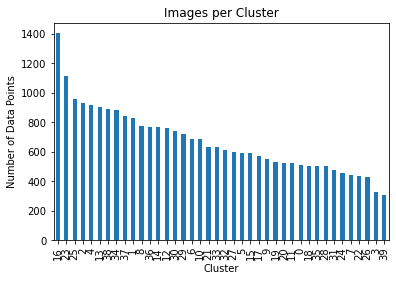

In [69]:
cluster_pd["yhat"].value_counts().plot(kind='bar')
plt.xlabel('Cluster')
plt.ylabel('Number of Data Points')
plt.title('Images per Cluster')
plt.show()

In [36]:
cluster_pd
cluster_pd.loc[cluster_pd['yhat'] == 26]

,yhat
17,26
85,26
121,26
230,26
244,26
...,...
26376,26
26643,26
26745,26
26780,26


In [70]:
# get the file path and the clusuters
cluster_pd["file_path"] = file_path

In [28]:
file_path[1][3:]
file_path = [e[3:] for e in file_path]
file_path[1]

'data/processed/glo-2021-25m/gloucester-25m-point-1667.tif'

In [22]:
#read in the RTC data
rtc = pd.read_csv('../data/processed/rtc/all_rtc_points.csv') 

,yhat,file_path
0,4,../data/processed/cam-2016-25m/cambdrige-25m-p...
1,14,../data/processed/glo-2021-25m/gloucester-25m-...
2,8,../data/processed/glo-2021-25m/gloucester-25m-...
3,8,../data/processed/glo-2021-25m/gloucester-25m-...
4,10,../data/processed/glo-2018-25m/gloucester-25m-...


In [71]:
df_all =pd.merge(cluster_pd, rtc, on="file_path")

In [72]:
df_all.head()

,yhat,file_path,point_id,night_count,morning_count,afternoon_evening_count,mid_of_day_count,wet_count,cycle_count,pedestrian_count,motorcycle_count,serious_count,dark_count,multi_vehicle_count,speed_above30_count,rtc_year_2018,rtc_year_2017,rtc_year_2020,rtc_year_2019,rtc_count_total
0,2,data/processed/glo-2018-25m/gloucester-25m-poi...,19435,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1
1,14,data/processed/oxf-2019-25m/oxford-25m-point-4...,4661,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1
2,25,data/processed/glo-2018-25m/gloucester-25m-poi...,15740,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1
3,17,data/processed/glo-2018-25m/gloucester-25m-poi...,16393,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
4,10,data/processed/oxf-2019-25m/oxford-25m-point-1...,14832,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,0,1


In [73]:
df_summarised =df_all.groupby("yhat").mean()

In [74]:
df_summarised["yhat_group"]= np.arange(df_summarised.shape[0])

In [75]:
df_summarised

,point_id,night_count,morning_count,afternoon_evening_count,mid_of_day_count,wet_count,cycle_count,pedestrian_count,motorcycle_count,serious_count,dark_count,multi_vehicle_count,speed_above30_count,rtc_year_2018,rtc_year_2017,rtc_year_2020,rtc_year_2019,rtc_count_total,yhat_group
yhat,,,,,,,,,,,,,,,,,,,
0,6000.650000,0.300000,0.300000,0.400000,0.400000,0.350000,0.600000,0.400000,0.100000,0.150000,0.450000,0.0,0.100000,0.500000,0.500000,0.100000,0.300000,1.400000,0
1,12332.181818,0.181818,0.454545,0.454545,0.181818,0.181818,0.454545,0.363636,0.181818,0.181818,0.272727,0.0,0.090909,0.363636,0.090909,0.090909,0.727273,1.272727,1
2,8686.800000,0.553846,0.523077,0.953846,0.646154,0.723077,1.384615,0.492308,0.323077,0.446154,0.830769,0.0,0.230769,0.676923,0.815385,0.446154,0.738462,2.676923,2
3,8642.880000,0.320000,0.400000,0.520000,0.160000,0.520000,0.320000,0.000000,0.200000,0.360000,0.360000,0.0,1.000000,0.440000,0.400000,0.120000,0.440000,1.400000,3
4,10688.254545,0.290909,0.381818,0.672727,0.454545,0.436364,0.618182,0.490909,0.127273,0.509091,0.563636,0.0,0.090909,0.490909,0.436364,0.400000,0.472727,1.800000,4
5,8981.800000,0.200000,0.400000,0.400000,0.400000,0.600000,0.200000,0.200000,0.000000,0.000000,0.200000,0.0,0.600000,0.000000,0.400000,0.400000,0.600000,1.400000,5
6,6929.966667,0.200000,0.433333,1.066667,0.500000,0.500000,1.166667,0.566667,0.233333,0.533333,0.500000,0.0,0.000000,0.533333,0.600000,0.300000,0.766667,2.200000,6
7,9568.863636,0.318182,0.454545,0.545455,0.227273,0.590909,0.772727,0.000000,0.181818,0.227273,0.500000,0.0,0.272727,0.318182,0.500000,0.363636,0.363636,1.545455,7
8,8085.812500,0.296875,0.484375,0.562500,0.500000,0.656250,0.343750,0.234375,0.281250,0.312500,0.500000,0.0,0.671875,0.562500,0.421875,0.421875,0.437500,1.843750,8


<AxesSubplot:xlabel='yhat_group'>

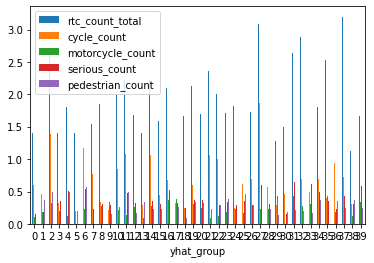

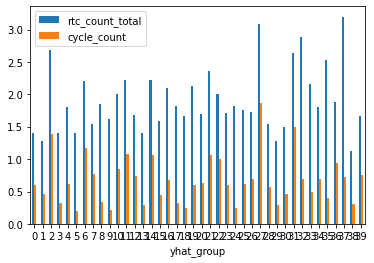

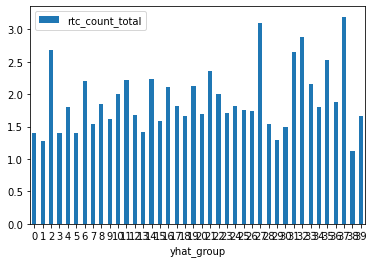

In [79]:
df_summarised.plot(x="yhat_group", y=["rtc_count_total", "cycle_count", "motorcycle_count","serious_count","pedestrian_count"], kind="bar", rot=0)
df_summarised.plot(x="yhat_group", y=["rtc_count_total", "cycle_count"], kind="bar", rot=0)
df_summarised.plot(x="yhat_group", y=["rtc_count_total"], kind="bar", rot=0)

In [66]:
# Statistical Tests
import scipy.stats as stats
stats.f_oneway(df_all["yhat"],df_all["rtc_count_total"])

F_onewayResult(statistic=3257.0859503965276, pvalue=0.0)

In [ ]:
# might be easier just to take the results back to R...

In [23]:
# # could try only keep variables with std above some number
# all_features2=all_features.loc[:, all_features.std() > .03]

In [ ]:
# examine images based on their paths and indexes

In [6]:
from PIL import Image

In [8]:
image=Image.open(file_path[26192])

In [48]:
#filelist = [file_path[26192],file_path[7715],file_path[8769],file_path[346],file_path[10735],file_path[10944]]
#filelist = [file_path[1328],file_path[17830],file_path[6186],file_path[19562],file_path[23246],file_path[16403]]
#filelist = [file_path[13860],file_path[7329],file_path[12681],file_path[13794],file_path[6908],file_path[5997]]

# KMEANS
#filelist = [file_path[2],file_path[64],file_path[90],file_path[26720],file_path[26753],file_path[26824]]
#filelist = [file_path[32],file_path[38],file_path[73],file_path[26623],file_path[26741],file_path[26781]]
#filelist = [file_path[22],file_path[79],file_path[160],file_path[26618],file_path[26707],file_path[26810]]
filelist = [file_path[17],file_path[85],file_path[244],file_path[26376],file_path[26745],file_path[26805]]
filelist

['../data/processed/glo-2018-25m/gloucester-25m-point-18975.tif',
 '../data/processed/cam-2016-25m/cambdrige-25m-point-742.tif',
 '../data/processed/oxf-2019-25m/oxford-25m-point-492.tif',
 '../data/processed/cam-2016-25m/cambdrige-25m-point-13514.tif',
 '../data/processed/glo-2021-25m/gloucester-25m-point-1784.tif',
 '../data/processed/oxf-2019-25m/oxford-25m-point-13917.tif']

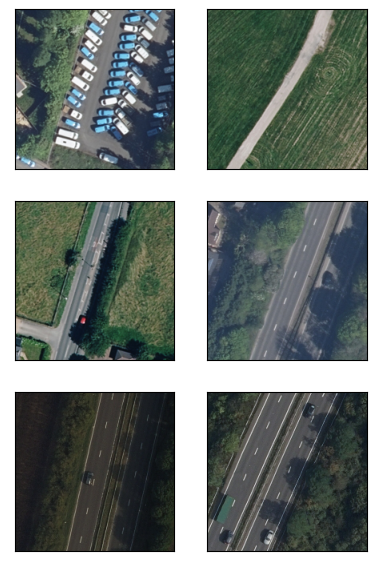

In [49]:
plt.figure(figsize=(12, 12))
ax = plt.subplot(5,5, 1 + 1)
plt.imshow(Image.open(filelist[0]))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

ax = plt.subplot(5,5, 1 + 1 + 5)
plt.imshow(Image.open(filelist[1]))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

ax = plt.subplot(5,5, 1 + 1 + 5 + 5)
plt.imshow(Image.open(filelist[2]))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

ax = plt.subplot(5, 5, 1 + 2 )
plt.imshow(Image.open(filelist[3]))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

ax = plt.subplot(5, 5, 1 + 2  + 5)
plt.imshow(Image.open(filelist[4]))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

ax = plt.subplot(5, 5, 1 + 2 + 5 + 5)
plt.imshow(Image.open(filelist[5]))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

In [6]:
# PCA
filelist = [file_path[26192],file_path[7715],file_path[8769],file_path[346],file_path[10735],file_path[6722]]
# filelist = [file_path[1328],file_path[17830],file_path[6186],file_path[19562],file_path[23246],file_path[16403]]
# filelist = [file_path[13860],file_path[7329],file_path[12681],file_path[13794],file_path[6908],file_path[5997]]

# KMEANS
# filelist = [file_path[2],file_path[64],file_path[90],file_path[26720],file_path[26753],file_path[26824]]
# filelist = [file_path[32],file_path[38],file_path[73],file_path[26623],file_path[26741],file_path[26781]]
# filelist = [file_path[22],file_path[79],file_path[160],file_path[26618],file_path[26707],file_path[26810]]
# filelist = [file_path[17],file_path[85],file_path[244],file_path[26376],file_path[26745],file_path[26805]]
images = []

# Generate data
for i, ID in enumerate(filelist):
    # Store sample
    dataset = gdal.Open(ID)
    image = dataset.ReadAsArray()  # Returned image is a NumPy array with shape (16, 60, 60) for example.
    images.append(image)  # Append the NumPy array to the list.

In [7]:
# Make images into on big array and then transpose for use in ML model
all_data= np.stack(images, axis= 0)
#all_data = np.transpose(all_data, axes=[0, 2, 3, 1])
# normalize values of the input data to 0,1
all_data = all_data/255
all_data.shape

(6, 3, 200, 200)

In [ ]:
plt.imshow(np.transpose(all_data[1], axes=[1, 2, 0]))

In [ ]:
plt.imshow(np.transpose(all_data, axes=[0, 2, 3, 1])[0])

In [7]:
# function to display images
def display(array1, array2, array3):
    """
    Displays 5 random images from each one of the supplied arrays.
    """

    n = 5

    indices = np.random.choice(len(array1), size=n, replace=False)
    images1 = array1[indices]
    images2 = array2[indices]
    images3 = array3[indices]

        
    plt.figure(figsize=(12, 12))
    for i, (image1, image2, image3) in enumerate(zip(images1, images2, images3)):
        ax = plt.subplot(5, n, i + 1)
        plt.imshow(np.transpose(image1, axes=[1, 2, 0]))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(5, n, i + 1 + n)
        plt.imshow(np.transpose(image2, axes=[1, 2, 0]))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        
        ax = plt.subplot(5, n, i + 1 + n + n)
        plt.imshow(np.transpose(image3, axes=[1, 2, 0]))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.show()
    

In [ ]:
display(all_data,all_data,all_data)